##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Autoencoders

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/autoencoder">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/autoencoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial introduces autoencoders with three examples: the basics, image denoising, and anomaly detection.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashion MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

16384/29515 [===============>..............] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


40960/29515 [=========================================] - 0s 0us/step


   16384/26421880 [..............................] - ETA: 0s

 5783552/26421880 [=====>........................] - ETA: 0s

 8396800/26421880 [========>.....................] - ETA: 0s

22814720/26421880 [========================>.....] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


26435584/26421880 [==============================] - 0s 0us/step


16384/5148 [===============================================================================================] - 0s 0us/step


  16384/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder
![Basic autoencoder results](images/intro_autoencoder_result.png)

Define an autoencoder with two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


In [4]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 21:09 - loss: 0.1649

  34/1875 [..............................] - ETA: 2s - loss: 0.1160   

  68/1875 [>.............................] - ETA: 2s - loss: 0.0915

 102/1875 [>.............................] - ETA: 2s - loss: 0.0788

 136/1875 [=>............................] - ETA: 2s - loss: 0.0708

 169/1875 [=>............................] - ETA: 2s - loss: 0.0656

 203/1875 [==>...........................] - ETA: 2s - loss: 0.0610

 236/1875 [==>...........................] - ETA: 2s - loss: 0.0575

 269/1875 [===>..........................] - ETA: 2s - loss: 0.0545

 302/1875 [===>..........................] - ETA: 2s - loss: 0.0520

 336/1875 [====>.........................] - ETA: 2s - loss: 0.0497

 370/1875 [====>.........................] - ETA: 2s - loss: 0.0478

 404/1875 [=====>........................] - ETA: 2s - loss: 0.0460

 438/1875 [======>.......................] - ETA: 2s - loss: 0.0445

 471/1875 [======>.......................] - ETA: 2s - loss: 0.0432

 504/1875 [=======>......................] - ETA: 2s - loss: 0.0420

 537/1875 [=======>......................] - ETA: 2s - loss: 0.0409

 570/1875 [========>.....................] - ETA: 1s - loss: 0.0398

 603/1875 [========>.....................] - ETA: 1s - loss: 0.0389

 637/1875 [=========>....................] - ETA: 1s - loss: 0.0380

 671/1875 [=========>....................] - ETA: 1s - loss: 0.0372

 704/1875 [==========>...................] - ETA: 1s - loss: 0.0364

 737/1875 [==========>...................] - ETA: 1s - loss: 0.0357

 770/1875 [===========>..................] - ETA: 1s - loss: 0.0351

 804/1875 [===========>..................] - ETA: 1s - loss: 0.0344

 835/1875 [============>.................] - ETA: 1s - loss: 0.0338

 866/1875 [============>.................] - ETA: 1s - loss: 0.0333

 896/1875 [=============>................] - ETA: 1s - loss: 0.0328

 925/1875 [=============>................] - ETA: 1s - loss: 0.0324

 958/1875 [==============>...............] - ETA: 1s - loss: 0.0319

 991/1875 [==============>...............] - ETA: 1s - loss: 0.0314

1024/1875 [===============>..............] - ETA: 1s - loss: 0.0310

1057/1875 [===============>..............] - ETA: 1s - loss: 0.0305

1091/1875 [================>.............] - ETA: 1s - loss: 0.0301

1125/1875 [=================>............] - ETA: 1s - loss: 0.0297

1159/1875 [=================>............] - ETA: 1s - loss: 0.0293

1193/1875 [==================>...........] - ETA: 1s - loss: 0.0289

1226/1875 [==================>...........] - ETA: 0s - loss: 0.0286

1260/1875 [===================>..........] - ETA: 0s - loss: 0.0283

1294/1875 [===================>..........] - ETA: 0s - loss: 0.0279

1328/1875 [====================>.........] - ETA: 0s - loss: 0.0276

1362/1875 [====================>.........] - ETA: 0s - loss: 0.0273

1396/1875 [=====================>........] - ETA: 0s - loss: 0.0270

1430/1875 [=====================>........] - ETA: 0s - loss: 0.0267

1463/1875 [======================>.......] - ETA: 0s - loss: 0.0265

1498/1875 [======================>.......] - ETA: 0s - loss: 0.0262

1533/1875 [=======================>......] - ETA: 0s - loss: 0.0259

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0257

1602/1875 [========================>.....] - ETA: 0s - loss: 0.0254

1636/1875 [=========================>....] - ETA: 0s - loss: 0.0252

1670/1875 [=========================>....] - ETA: 0s - loss: 0.0249

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0247

1738/1875 [==========================>...] - ETA: 0s - loss: 0.0245

1771/1875 [===========================>..] - ETA: 0s - loss: 0.0243

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0241

1839/1875 [============================>.] - ETA: 0s - loss: 0.0239

1873/1875 [============================>.] - ETA: 0s - loss: 0.0237

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - val_loss: 0.0133


Epoch 2/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0128

  35/1875 [..............................] - ETA: 2s - loss: 0.0134

  69/1875 [>.............................] - ETA: 2s - loss: 0.0132

 102/1875 [>.............................] - ETA: 2s - loss: 0.0132

 135/1875 [=>............................] - ETA: 2s - loss: 0.0131

 168/1875 [=>............................] - ETA: 2s - loss: 0.0130

 201/1875 [==>...........................] - ETA: 2s - loss: 0.0130

 235/1875 [==>...........................] - ETA: 2s - loss: 0.0129

 269/1875 [===>..........................] - ETA: 2s - loss: 0.0129

 303/1875 [===>..........................] - ETA: 2s - loss: 0.0128

 337/1875 [====>.........................] - ETA: 2s - loss: 0.0128

 371/1875 [====>.........................] - ETA: 2s - loss: 0.0128

 405/1875 [=====>........................] - ETA: 2s - loss: 0.0127

 439/1875 [======>.......................] - ETA: 2s - loss: 0.0127

 471/1875 [======>.......................] - ETA: 2s - loss: 0.0127

 502/1875 [=======>......................] - ETA: 2s - loss: 0.0126

 534/1875 [=======>......................] - ETA: 2s - loss: 0.0126

 568/1875 [========>.....................] - ETA: 1s - loss: 0.0126

 601/1875 [========>.....................] - ETA: 1s - loss: 0.0125

 632/1875 [=========>....................] - ETA: 1s - loss: 0.0125

 665/1875 [=========>....................] - ETA: 1s - loss: 0.0125

 698/1875 [==========>...................] - ETA: 1s - loss: 0.0124

 730/1875 [==========>...................] - ETA: 1s - loss: 0.0124

 763/1875 [===========>..................] - ETA: 1s - loss: 0.0124

 796/1875 [===========>..................] - ETA: 1s - loss: 0.0123

 829/1875 [============>.................] - ETA: 1s - loss: 0.0123

 862/1875 [============>.................] - ETA: 1s - loss: 0.0123

 896/1875 [=============>................] - ETA: 1s - loss: 0.0123

 930/1875 [=============>................] - ETA: 1s - loss: 0.0122

 964/1875 [==============>...............] - ETA: 1s - loss: 0.0122

 998/1875 [==============>...............] - ETA: 1s - loss: 0.0122

1032/1875 [===============>..............] - ETA: 1s - loss: 0.0122

1066/1875 [================>.............] - ETA: 1s - loss: 0.0121

1099/1875 [================>.............] - ETA: 1s - loss: 0.0121

1131/1875 [=================>............] - ETA: 1s - loss: 0.0121

1163/1875 [=================>............] - ETA: 1s - loss: 0.0121

1197/1875 [==================>...........] - ETA: 1s - loss: 0.0121

1231/1875 [==================>...........] - ETA: 0s - loss: 0.0120

1265/1875 [===================>..........] - ETA: 0s - loss: 0.0120

1299/1875 [===================>..........] - ETA: 0s - loss: 0.0120

1334/1875 [====================>.........] - ETA: 0s - loss: 0.0120

1368/1875 [====================>.........] - ETA: 0s - loss: 0.0119

1401/1875 [=====================>........] - ETA: 0s - loss: 0.0119

1435/1875 [=====================>........] - ETA: 0s - loss: 0.0119

1469/1875 [======================>.......] - ETA: 0s - loss: 0.0119

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0119

1537/1875 [=======================>......] - ETA: 0s - loss: 0.0118

1572/1875 [========================>.....] - ETA: 0s - loss: 0.0118

1606/1875 [========================>.....] - ETA: 0s - loss: 0.0118

1640/1875 [=========================>....] - ETA: 0s - loss: 0.0118

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0118

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0118

1743/1875 [==========================>...] - ETA: 0s - loss: 0.0117

1778/1875 [===========================>..] - ETA: 0s - loss: 0.0117

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0117

1847/1875 [============================>.] - ETA: 0s - loss: 0.0117

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0117 - val_loss: 0.0107


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0109

  33/1875 [..............................] - ETA: 2s - loss: 0.0108

  67/1875 [>.............................] - ETA: 2s - loss: 0.0106

 101/1875 [>.............................] - ETA: 2s - loss: 0.0106

 134/1875 [=>............................] - ETA: 2s - loss: 0.0106

 167/1875 [=>............................] - ETA: 2s - loss: 0.0106

 201/1875 [==>...........................] - ETA: 2s - loss: 0.0106

 236/1875 [==>...........................] - ETA: 2s - loss: 0.0106

 271/1875 [===>..........................] - ETA: 2s - loss: 0.0106

 306/1875 [===>..........................] - ETA: 2s - loss: 0.0105

 340/1875 [====>.........................] - ETA: 2s - loss: 0.0105

 375/1875 [=====>........................] - ETA: 2s - loss: 0.0105

 409/1875 [=====>........................] - ETA: 2s - loss: 0.0105

 443/1875 [======>.......................] - ETA: 2s - loss: 0.0104

 477/1875 [======>.......................] - ETA: 2s - loss: 0.0105

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0105

 545/1875 [=======>......................] - ETA: 1s - loss: 0.0104

 579/1875 [========>.....................] - ETA: 1s - loss: 0.0104

 613/1875 [========>.....................] - ETA: 1s - loss: 0.0104

 647/1875 [=========>....................] - ETA: 1s - loss: 0.0104

 681/1875 [=========>....................] - ETA: 1s - loss: 0.0104

 714/1875 [==========>...................] - ETA: 1s - loss: 0.0104

 748/1875 [==========>...................] - ETA: 1s - loss: 0.0104

 782/1875 [===========>..................] - ETA: 1s - loss: 0.0104

 816/1875 [============>.................] - ETA: 1s - loss: 0.0104

 849/1875 [============>.................] - ETA: 1s - loss: 0.0104

 883/1875 [=============>................] - ETA: 1s - loss: 0.0104

 917/1875 [=============>................] - ETA: 1s - loss: 0.0104

 951/1875 [==============>...............] - ETA: 1s - loss: 0.0103

 985/1875 [==============>...............] - ETA: 1s - loss: 0.0103

1019/1875 [===============>..............] - ETA: 1s - loss: 0.0103

1053/1875 [===============>..............] - ETA: 1s - loss: 0.0103

1087/1875 [================>.............] - ETA: 1s - loss: 0.0103

1120/1875 [================>.............] - ETA: 1s - loss: 0.0103

1154/1875 [=================>............] - ETA: 1s - loss: 0.0103

1188/1875 [==================>...........] - ETA: 1s - loss: 0.0103

1223/1875 [==================>...........] - ETA: 0s - loss: 0.0103

1256/1875 [===================>..........] - ETA: 0s - loss: 0.0103

1289/1875 [===================>..........] - ETA: 0s - loss: 0.0103

1323/1875 [====================>.........] - ETA: 0s - loss: 0.0103

1357/1875 [====================>.........] - ETA: 0s - loss: 0.0103

1390/1875 [=====================>........] - ETA: 0s - loss: 0.0103

1424/1875 [=====================>........] - ETA: 0s - loss: 0.0102

1458/1875 [======================>.......] - ETA: 0s - loss: 0.0102

1491/1875 [======================>.......] - ETA: 0s - loss: 0.0102

1525/1875 [=======================>......] - ETA: 0s - loss: 0.0102

1559/1875 [=======================>......] - ETA: 0s - loss: 0.0102

1593/1875 [========================>.....] - ETA: 0s - loss: 0.0102

1628/1875 [=========================>....] - ETA: 0s - loss: 0.0102

1662/1875 [=========================>....] - ETA: 0s - loss: 0.0102

1696/1875 [==========================>...] - ETA: 0s - loss: 0.0102

1731/1875 [==========================>...] - ETA: 0s - loss: 0.0102

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0102

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0101

1833/1875 [============================>.] - ETA: 0s - loss: 0.0101

1867/1875 [============================>.] - ETA: 0s - loss: 0.0101

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0101 - val_loss: 0.0099


Epoch 4/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0095

  35/1875 [..............................] - ETA: 2s - loss: 0.0097

  69/1875 [>.............................] - ETA: 2s - loss: 0.0099

 103/1875 [>.............................] - ETA: 2s - loss: 0.0098

 137/1875 [=>............................] - ETA: 2s - loss: 0.0097

 171/1875 [=>............................] - ETA: 2s - loss: 0.0097

 205/1875 [==>...........................] - ETA: 2s - loss: 0.0098

 238/1875 [==>...........................] - ETA: 2s - loss: 0.0097

 272/1875 [===>..........................] - ETA: 2s - loss: 0.0097

 306/1875 [===>..........................] - ETA: 2s - loss: 0.0098

 339/1875 [====>.........................] - ETA: 2s - loss: 0.0097

 373/1875 [====>.........................] - ETA: 2s - loss: 0.0097

 407/1875 [=====>........................] - ETA: 2s - loss: 0.0097

 441/1875 [======>.......................] - ETA: 2s - loss: 0.0097

 474/1875 [======>.......................] - ETA: 2s - loss: 0.0097

 508/1875 [=======>......................] - ETA: 2s - loss: 0.0097

 542/1875 [=======>......................] - ETA: 1s - loss: 0.0097

 576/1875 [========>.....................] - ETA: 1s - loss: 0.0097

 609/1875 [========>.....................] - ETA: 1s - loss: 0.0097

 642/1875 [=========>....................] - ETA: 1s - loss: 0.0097

 675/1875 [=========>....................] - ETA: 1s - loss: 0.0097

 707/1875 [==========>...................] - ETA: 1s - loss: 0.0097

 740/1875 [==========>...................] - ETA: 1s - loss: 0.0097

 774/1875 [===========>..................] - ETA: 1s - loss: 0.0097

 808/1875 [===========>..................] - ETA: 1s - loss: 0.0097

 842/1875 [============>.................] - ETA: 1s - loss: 0.0097

 876/1875 [=============>................] - ETA: 1s - loss: 0.0096

 908/1875 [=============>................] - ETA: 1s - loss: 0.0096

 942/1875 [==============>...............] - ETA: 1s - loss: 0.0096

 976/1875 [==============>...............] - ETA: 1s - loss: 0.0096

1009/1875 [===============>..............] - ETA: 1s - loss: 0.0096

1041/1875 [===============>..............] - ETA: 1s - loss: 0.0096

1074/1875 [================>.............] - ETA: 1s - loss: 0.0096

1106/1875 [================>.............] - ETA: 1s - loss: 0.0096

1138/1875 [=================>............] - ETA: 1s - loss: 0.0096

1170/1875 [=================>............] - ETA: 1s - loss: 0.0096

1202/1875 [==================>...........] - ETA: 1s - loss: 0.0096

1235/1875 [==================>...........] - ETA: 0s - loss: 0.0096

1269/1875 [===================>..........] - ETA: 0s - loss: 0.0096

1302/1875 [===================>..........] - ETA: 0s - loss: 0.0096

1333/1875 [====================>.........] - ETA: 0s - loss: 0.0096

1367/1875 [====================>.........] - ETA: 0s - loss: 0.0095

1400/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1434/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1468/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1536/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1571/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1605/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1639/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1672/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1707/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1741/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1774/1875 [===========================>..] - ETA: 0s - loss: 0.0095

1807/1875 [===========================>..] - ETA: 0s - loss: 0.0095

1841/1875 [============================>.] - ETA: 0s - loss: 0.0095

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0095 - val_loss: 0.0094


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0092

  35/1875 [..............................] - ETA: 2s - loss: 0.0092

  70/1875 [>.............................] - ETA: 2s - loss: 0.0091

 103/1875 [>.............................] - ETA: 2s - loss: 0.0091

 137/1875 [=>............................] - ETA: 2s - loss: 0.0092

 170/1875 [=>............................] - ETA: 2s - loss: 0.0092

 204/1875 [==>...........................] - ETA: 2s - loss: 0.0093

 238/1875 [==>...........................] - ETA: 2s - loss: 0.0092

 271/1875 [===>..........................] - ETA: 2s - loss: 0.0092

 304/1875 [===>..........................] - ETA: 2s - loss: 0.0093

 337/1875 [====>.........................] - ETA: 2s - loss: 0.0093

 371/1875 [====>.........................] - ETA: 2s - loss: 0.0093

 405/1875 [=====>........................] - ETA: 2s - loss: 0.0093

 438/1875 [======>.......................] - ETA: 2s - loss: 0.0093

 472/1875 [======>.......................] - ETA: 2s - loss: 0.0093

 507/1875 [=======>......................] - ETA: 2s - loss: 0.0092

 541/1875 [=======>......................] - ETA: 2s - loss: 0.0092

 575/1875 [========>.....................] - ETA: 1s - loss: 0.0093

 609/1875 [========>.....................] - ETA: 1s - loss: 0.0093

 643/1875 [=========>....................] - ETA: 1s - loss: 0.0092

 675/1875 [=========>....................] - ETA: 1s - loss: 0.0093

 708/1875 [==========>...................] - ETA: 1s - loss: 0.0092

 743/1875 [==========>...................] - ETA: 1s - loss: 0.0092

 777/1875 [===========>..................] - ETA: 1s - loss: 0.0093

 811/1875 [===========>..................] - ETA: 1s - loss: 0.0092

 845/1875 [============>.................] - ETA: 1s - loss: 0.0092

 879/1875 [=============>................] - ETA: 1s - loss: 0.0093

 913/1875 [=============>................] - ETA: 1s - loss: 0.0093

 945/1875 [==============>...............] - ETA: 1s - loss: 0.0093

 979/1875 [==============>...............] - ETA: 1s - loss: 0.0093

1012/1875 [===============>..............] - ETA: 1s - loss: 0.0093

1045/1875 [===============>..............] - ETA: 1s - loss: 0.0092

1078/1875 [================>.............] - ETA: 1s - loss: 0.0092

1112/1875 [================>.............] - ETA: 1s - loss: 0.0092

1146/1875 [=================>............] - ETA: 1s - loss: 0.0092

1179/1875 [=================>............] - ETA: 1s - loss: 0.0092

1213/1875 [==================>...........] - ETA: 0s - loss: 0.0092

1247/1875 [==================>...........] - ETA: 0s - loss: 0.0092

1281/1875 [===================>..........] - ETA: 0s - loss: 0.0092

1315/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1349/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1382/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1416/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1450/1875 [======================>.......] - ETA: 0s - loss: 0.0092

1485/1875 [======================>.......] - ETA: 0s - loss: 0.0092

1519/1875 [=======================>......] - ETA: 0s - loss: 0.0092

1553/1875 [=======================>......] - ETA: 0s - loss: 0.0092

1587/1875 [========================>.....] - ETA: 0s - loss: 0.0092

1620/1875 [========================>.....] - ETA: 0s - loss: 0.0092

1654/1875 [=========================>....] - ETA: 0s - loss: 0.0092

1688/1875 [==========================>...] - ETA: 0s - loss: 0.0092

1722/1875 [==========================>...] - ETA: 0s - loss: 0.0092

1756/1875 [===========================>..] - ETA: 0s - loss: 0.0092

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0092

1824/1875 [============================>.] - ETA: 0s - loss: 0.0092

1857/1875 [============================>.] - ETA: 0s - loss: 0.0092

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0091


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0085

  34/1875 [..............................] - ETA: 2s - loss: 0.0087

  68/1875 [>.............................] - ETA: 2s - loss: 0.0089

 101/1875 [>.............................] - ETA: 2s - loss: 0.0090

 134/1875 [=>............................] - ETA: 2s - loss: 0.0090

 167/1875 [=>............................] - ETA: 2s - loss: 0.0091

 200/1875 [==>...........................] - ETA: 2s - loss: 0.0091

 234/1875 [==>...........................] - ETA: 2s - loss: 0.0091

 268/1875 [===>..........................] - ETA: 2s - loss: 0.0091

 301/1875 [===>..........................] - ETA: 2s - loss: 0.0091

 335/1875 [====>.........................] - ETA: 2s - loss: 0.0090

 368/1875 [====>.........................] - ETA: 2s - loss: 0.0090

 402/1875 [=====>........................] - ETA: 2s - loss: 0.0090

 435/1875 [=====>........................] - ETA: 2s - loss: 0.0090

 469/1875 [======>.......................] - ETA: 2s - loss: 0.0090

 503/1875 [=======>......................] - ETA: 2s - loss: 0.0090

 537/1875 [=======>......................] - ETA: 2s - loss: 0.0090

 571/1875 [========>.....................] - ETA: 1s - loss: 0.0090

 605/1875 [========>.....................] - ETA: 1s - loss: 0.0090

 639/1875 [=========>....................] - ETA: 1s - loss: 0.0090

 673/1875 [=========>....................] - ETA: 1s - loss: 0.0090

 708/1875 [==========>...................] - ETA: 1s - loss: 0.0090

 741/1875 [==========>...................] - ETA: 1s - loss: 0.0090

 774/1875 [===========>..................] - ETA: 1s - loss: 0.0090

 806/1875 [===========>..................] - ETA: 1s - loss: 0.0090

 839/1875 [============>.................] - ETA: 1s - loss: 0.0090

 872/1875 [============>.................] - ETA: 1s - loss: 0.0090

 907/1875 [=============>................] - ETA: 1s - loss: 0.0090

 942/1875 [==============>...............] - ETA: 1s - loss: 0.0090

 976/1875 [==============>...............] - ETA: 1s - loss: 0.0090

1009/1875 [===============>..............] - ETA: 1s - loss: 0.0090

1043/1875 [===============>..............] - ETA: 1s - loss: 0.0090

1077/1875 [================>.............] - ETA: 1s - loss: 0.0090

1111/1875 [================>.............] - ETA: 1s - loss: 0.0090

1144/1875 [=================>............] - ETA: 1s - loss: 0.0090

1177/1875 [=================>............] - ETA: 1s - loss: 0.0090

1212/1875 [==================>...........] - ETA: 0s - loss: 0.0090

1246/1875 [==================>...........] - ETA: 0s - loss: 0.0090

1281/1875 [===================>..........] - ETA: 0s - loss: 0.0090

1315/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1349/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1383/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1417/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1450/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1483/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1516/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1550/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1584/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1652/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1687/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1720/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1786/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1820/1875 [============================>.] - ETA: 0s - loss: 0.0090

1853/1875 [============================>.] - ETA: 0s - loss: 0.0090

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0090


Epoch 7/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0083

  34/1875 [..............................] - ETA: 2s - loss: 0.0087

  67/1875 [>.............................] - ETA: 2s - loss: 0.0087

 101/1875 [>.............................] - ETA: 2s - loss: 0.0087

 135/1875 [=>............................] - ETA: 2s - loss: 0.0087

 169/1875 [=>............................] - ETA: 2s - loss: 0.0087

 203/1875 [==>...........................] - ETA: 2s - loss: 0.0088

 235/1875 [==>...........................] - ETA: 2s - loss: 0.0089

 268/1875 [===>..........................] - ETA: 2s - loss: 0.0088

 302/1875 [===>..........................] - ETA: 2s - loss: 0.0088

 336/1875 [====>.........................] - ETA: 2s - loss: 0.0089

 370/1875 [====>.........................] - ETA: 2s - loss: 0.0089

 404/1875 [=====>........................] - ETA: 2s - loss: 0.0089

 438/1875 [======>.......................] - ETA: 2s - loss: 0.0089

 472/1875 [======>.......................] - ETA: 2s - loss: 0.0089

 506/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 540/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 573/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 606/1875 [========>.....................] - ETA: 1s - loss: 0.0089

 639/1875 [=========>....................] - ETA: 1s - loss: 0.0089

 671/1875 [=========>....................] - ETA: 1s - loss: 0.0089

 705/1875 [==========>...................] - ETA: 1s - loss: 0.0089

 739/1875 [==========>...................] - ETA: 1s - loss: 0.0089

 773/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 808/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 842/1875 [============>.................] - ETA: 1s - loss: 0.0089

 875/1875 [=============>................] - ETA: 1s - loss: 0.0089

 908/1875 [=============>................] - ETA: 1s - loss: 0.0089

 942/1875 [==============>...............] - ETA: 1s - loss: 0.0089

 976/1875 [==============>...............] - ETA: 1s - loss: 0.0089

1010/1875 [===============>..............] - ETA: 1s - loss: 0.0089

1045/1875 [===============>..............] - ETA: 1s - loss: 0.0089

1079/1875 [================>.............] - ETA: 1s - loss: 0.0089

1113/1875 [================>.............] - ETA: 1s - loss: 0.0089

1147/1875 [=================>............] - ETA: 1s - loss: 0.0089

1181/1875 [=================>............] - ETA: 1s - loss: 0.0089

1215/1875 [==================>...........] - ETA: 0s - loss: 0.0089

1249/1875 [==================>...........] - ETA: 0s - loss: 0.0089

1283/1875 [===================>..........] - ETA: 0s - loss: 0.0089

1316/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1348/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1382/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1416/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1451/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1485/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1519/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1554/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1588/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1622/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1656/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1690/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1724/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1758/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1824/1875 [============================>.] - ETA: 0s - loss: 0.0089

1858/1875 [============================>.] - ETA: 0s - loss: 0.0089

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0089


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0102

  35/1875 [..............................] - ETA: 2s - loss: 0.0088

  69/1875 [>.............................] - ETA: 2s - loss: 0.0088

 101/1875 [>.............................] - ETA: 2s - loss: 0.0089

 135/1875 [=>............................] - ETA: 2s - loss: 0.0088

 169/1875 [=>............................] - ETA: 2s - loss: 0.0088

 203/1875 [==>...........................] - ETA: 2s - loss: 0.0088

 237/1875 [==>...........................] - ETA: 2s - loss: 0.0088

 271/1875 [===>..........................] - ETA: 2s - loss: 0.0088

 304/1875 [===>..........................] - ETA: 2s - loss: 0.0088

 337/1875 [====>.........................] - ETA: 2s - loss: 0.0088

 371/1875 [====>.........................] - ETA: 2s - loss: 0.0088

 404/1875 [=====>........................] - ETA: 2s - loss: 0.0088

 437/1875 [=====>........................] - ETA: 2s - loss: 0.0088

 470/1875 [======>.......................] - ETA: 2s - loss: 0.0088

 503/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 537/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 571/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 604/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 638/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 671/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 705/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 739/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 772/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 806/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 838/1875 [============>.................] - ETA: 1s - loss: 0.0088

 870/1875 [============>.................] - ETA: 1s - loss: 0.0088

 903/1875 [=============>................] - ETA: 1s - loss: 0.0088

 937/1875 [=============>................] - ETA: 1s - loss: 0.0088

 971/1875 [==============>...............] - ETA: 1s - loss: 0.0088

1003/1875 [===============>..............] - ETA: 1s - loss: 0.0088

1034/1875 [===============>..............] - ETA: 1s - loss: 0.0088

1065/1875 [================>.............] - ETA: 1s - loss: 0.0088

1096/1875 [================>.............] - ETA: 1s - loss: 0.0088

1126/1875 [=================>............] - ETA: 1s - loss: 0.0088

1156/1875 [=================>............] - ETA: 1s - loss: 0.0088

1186/1875 [=================>............] - ETA: 1s - loss: 0.0088

1217/1875 [==================>...........] - ETA: 1s - loss: 0.0088

1249/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1280/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1311/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1342/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1374/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1405/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1438/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1472/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1505/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1537/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1570/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1603/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1636/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1669/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1700/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1731/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1796/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1828/1875 [============================>.] - ETA: 0s - loss: 0.0088

1859/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0089


Epoch 9/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0101

  33/1875 [..............................] - ETA: 2s - loss: 0.0087

  66/1875 [>.............................] - ETA: 2s - loss: 0.0086

 100/1875 [>.............................] - ETA: 2s - loss: 0.0087

 134/1875 [=>............................] - ETA: 2s - loss: 0.0087

 167/1875 [=>............................] - ETA: 2s - loss: 0.0087

 199/1875 [==>...........................] - ETA: 2s - loss: 0.0088

 231/1875 [==>...........................] - ETA: 2s - loss: 0.0087

 265/1875 [===>..........................] - ETA: 2s - loss: 0.0087

 299/1875 [===>..........................] - ETA: 2s - loss: 0.0087

 334/1875 [====>.........................] - ETA: 2s - loss: 0.0088

 368/1875 [====>.........................] - ETA: 2s - loss: 0.0087

 401/1875 [=====>........................] - ETA: 2s - loss: 0.0087

 434/1875 [=====>........................] - ETA: 2s - loss: 0.0087

 467/1875 [======>.......................] - ETA: 2s - loss: 0.0087

 500/1875 [=======>......................] - ETA: 2s - loss: 0.0087

 532/1875 [=======>......................] - ETA: 2s - loss: 0.0087

 565/1875 [========>.....................] - ETA: 1s - loss: 0.0087

 598/1875 [========>.....................] - ETA: 1s - loss: 0.0087

 632/1875 [=========>....................] - ETA: 1s - loss: 0.0087

 666/1875 [=========>....................] - ETA: 1s - loss: 0.0087

 700/1875 [==========>...................] - ETA: 1s - loss: 0.0087

 734/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 768/1875 [===========>..................] - ETA: 1s - loss: 0.0087

 803/1875 [===========>..................] - ETA: 1s - loss: 0.0087

 837/1875 [============>.................] - ETA: 1s - loss: 0.0087

 870/1875 [============>.................] - ETA: 1s - loss: 0.0087

 903/1875 [=============>................] - ETA: 1s - loss: 0.0087

 937/1875 [=============>................] - ETA: 1s - loss: 0.0087

 970/1875 [==============>...............] - ETA: 1s - loss: 0.0087

1004/1875 [===============>..............] - ETA: 1s - loss: 0.0087

1037/1875 [===============>..............] - ETA: 1s - loss: 0.0087

1070/1875 [================>.............] - ETA: 1s - loss: 0.0087

1104/1875 [================>.............] - ETA: 1s - loss: 0.0087

1138/1875 [=================>............] - ETA: 1s - loss: 0.0087

1172/1875 [=================>............] - ETA: 1s - loss: 0.0087

1206/1875 [==================>...........] - ETA: 1s - loss: 0.0087

1240/1875 [==================>...........] - ETA: 0s - loss: 0.0087

1274/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1309/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1343/1875 [====================>.........] - ETA: 0s - loss: 0.0087

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1412/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1446/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1480/1875 [======================>.......] - ETA: 0s - loss: 0.0087

1513/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1546/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1581/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1647/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1681/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1714/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1747/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1779/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1844/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0088


Epoch 10/10


   1/1875 [..............................] - ETA: 4s - loss: 0.0086

  34/1875 [..............................] - ETA: 2s - loss: 0.0087

  67/1875 [>.............................] - ETA: 2s - loss: 0.0087

 100/1875 [>.............................] - ETA: 2s - loss: 0.0087

 133/1875 [=>............................] - ETA: 2s - loss: 0.0087

 167/1875 [=>............................] - ETA: 2s - loss: 0.0087

 201/1875 [==>...........................] - ETA: 2s - loss: 0.0087

 235/1875 [==>...........................] - ETA: 2s - loss: 0.0087

 269/1875 [===>..........................] - ETA: 2s - loss: 0.0087

 303/1875 [===>..........................] - ETA: 2s - loss: 0.0087

 338/1875 [====>.........................] - ETA: 2s - loss: 0.0087

 371/1875 [====>.........................] - ETA: 2s - loss: 0.0088

 405/1875 [=====>........................] - ETA: 2s - loss: 0.0087

 439/1875 [======>.......................] - ETA: 2s - loss: 0.0087

 473/1875 [======>.......................] - ETA: 2s - loss: 0.0087

 507/1875 [=======>......................] - ETA: 2s - loss: 0.0088

 541/1875 [=======>......................] - ETA: 2s - loss: 0.0087

 575/1875 [========>.....................] - ETA: 1s - loss: 0.0087

 609/1875 [========>.....................] - ETA: 1s - loss: 0.0087

 644/1875 [=========>....................] - ETA: 1s - loss: 0.0087

 678/1875 [=========>....................] - ETA: 1s - loss: 0.0087

 711/1875 [==========>...................] - ETA: 1s - loss: 0.0087

 745/1875 [==========>...................] - ETA: 1s - loss: 0.0087

 780/1875 [===========>..................] - ETA: 1s - loss: 0.0087

 815/1875 [============>.................] - ETA: 1s - loss: 0.0087

 849/1875 [============>.................] - ETA: 1s - loss: 0.0087

 883/1875 [=============>................] - ETA: 1s - loss: 0.0087

 917/1875 [=============>................] - ETA: 1s - loss: 0.0087

 951/1875 [==============>...............] - ETA: 1s - loss: 0.0087

 986/1875 [==============>...............] - ETA: 1s - loss: 0.0087

1020/1875 [===============>..............] - ETA: 1s - loss: 0.0087

1054/1875 [===============>..............] - ETA: 1s - loss: 0.0087

1088/1875 [================>.............] - ETA: 1s - loss: 0.0087

1122/1875 [================>.............] - ETA: 1s - loss: 0.0087

1156/1875 [=================>............] - ETA: 1s - loss: 0.0087

1190/1875 [==================>...........] - ETA: 1s - loss: 0.0087

1222/1875 [==================>...........] - ETA: 0s - loss: 0.0087

1256/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1290/1875 [===================>..........] - ETA: 0s - loss: 0.0087

1323/1875 [====================>.........] - ETA: 0s - loss: 0.0087

1356/1875 [====================>.........] - ETA: 0s - loss: 0.0087

1388/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1421/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1454/1875 [======================>.......] - ETA: 0s - loss: 0.0087

1488/1875 [======================>.......] - ETA: 0s - loss: 0.0087

1523/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1591/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1626/1875 [=========================>....] - ETA: 0s - loss: 0.0087

1660/1875 [=========================>....] - ETA: 0s - loss: 0.0087

1694/1875 [==========================>...] - ETA: 0s - loss: 0.0087

1728/1875 [==========================>...] - ETA: 0s - loss: 0.0087

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0087

1796/1875 [===========================>..] - ETA: 0s - loss: 0.0087

1831/1875 [============================>.] - ETA: 0s - loss: 0.0087

1865/1875 [============================>.] - ETA: 0s - loss: 0.0087

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0087 - val_loss: 0.0088


Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

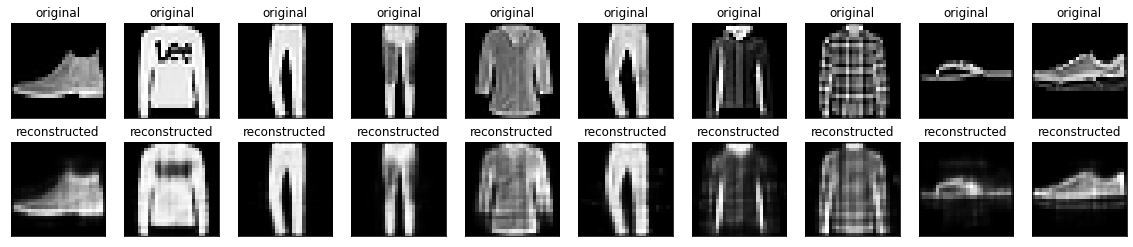

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Second example: Image denoising


![Image denoising results](images/image_denoise_fmnist_results.png)

An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


Adding random noise to the images

In [11]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


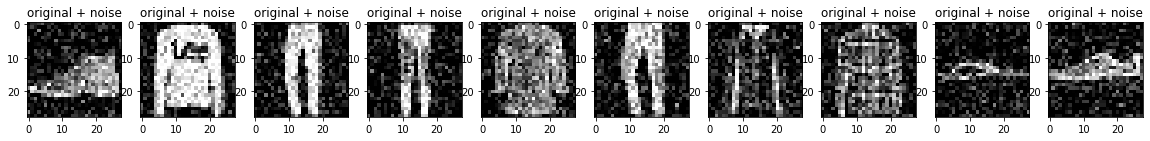

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [13]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 4:03:58 - loss: 0.1688

  19/1875 [..............................] - ETA: 5s - loss: 0.1660     

  38/1875 [..............................] - ETA: 5s - loss: 0.1543

  58/1875 [..............................] - ETA: 4s - loss: 0.1322

  77/1875 [>.............................] - ETA: 4s - loss: 0.1113

  96/1875 [>.............................] - ETA: 4s - loss: 0.0953

 115/1875 [>.............................] - ETA: 4s - loss: 0.0839

 133/1875 [=>............................] - ETA: 4s - loss: 0.0758

 152/1875 [=>............................] - ETA: 4s - loss: 0.0690

 171/1875 [=>............................] - ETA: 4s - loss: 0.0636

 190/1875 [==>...........................] - ETA: 4s - loss: 0.0591

 209/1875 [==>...........................] - ETA: 4s - loss: 0.0555

 229/1875 [==>...........................] - ETA: 4s - loss: 0.0521

 248/1875 [==>...........................] - ETA: 4s - loss: 0.0494

 268/1875 [===>..........................] - ETA: 4s - loss: 0.0469

 288/1875 [===>..........................] - ETA: 4s - loss: 0.0448

 308/1875 [===>..........................] - ETA: 4s - loss: 0.0430

 327/1875 [====>.........................] - ETA: 4s - loss: 0.0414

 347/1875 [====>.........................] - ETA: 4s - loss: 0.0398

 366/1875 [====>.........................] - ETA: 4s - loss: 0.0385

 385/1875 [=====>........................] - ETA: 3s - loss: 0.0373

 404/1875 [=====>........................] - ETA: 3s - loss: 0.0363

 423/1875 [=====>........................] - ETA: 3s - loss: 0.0353

 442/1875 [======>.......................] - ETA: 3s - loss: 0.0344

 462/1875 [======>.......................] - ETA: 3s - loss: 0.0335

 481/1875 [======>.......................] - ETA: 3s - loss: 0.0327

 501/1875 [=======>......................] - ETA: 3s - loss: 0.0320

 520/1875 [=======>......................] - ETA: 3s - loss: 0.0313

 538/1875 [=======>......................] - ETA: 3s - loss: 0.0307

 557/1875 [=======>......................] - ETA: 3s - loss: 0.0301

 576/1875 [========>.....................] - ETA: 3s - loss: 0.0296

 594/1875 [========>.....................] - ETA: 3s - loss: 0.0291

 612/1875 [========>.....................] - ETA: 3s - loss: 0.0286

 630/1875 [=========>....................] - ETA: 3s - loss: 0.0281

 649/1875 [=========>....................] - ETA: 3s - loss: 0.0277

 668/1875 [=========>....................] - ETA: 3s - loss: 0.0273

 687/1875 [=========>....................] - ETA: 3s - loss: 0.0269

 706/1875 [==========>...................] - ETA: 3s - loss: 0.0265

 725/1875 [==========>...................] - ETA: 3s - loss: 0.0261

 744/1875 [==========>...................] - ETA: 3s - loss: 0.0258

 763/1875 [===========>..................] - ETA: 2s - loss: 0.0254

 781/1875 [===========>..................] - ETA: 2s - loss: 0.0251

 799/1875 [===========>..................] - ETA: 2s - loss: 0.0248

 817/1875 [============>.................] - ETA: 2s - loss: 0.0245

 835/1875 [============>.................] - ETA: 2s - loss: 0.0243

 854/1875 [============>.................] - ETA: 2s - loss: 0.0240

 873/1875 [============>.................] - ETA: 2s - loss: 0.0237

 892/1875 [=============>................] - ETA: 2s - loss: 0.0235

 912/1875 [=============>................] - ETA: 2s - loss: 0.0232

 932/1875 [=============>................] - ETA: 2s - loss: 0.0230

 952/1875 [==============>...............] - ETA: 2s - loss: 0.0227

 972/1875 [==============>...............] - ETA: 2s - loss: 0.0225

 992/1875 [==============>...............] - ETA: 2s - loss: 0.0223

1012/1875 [===============>..............] - ETA: 2s - loss: 0.0220

1032/1875 [===============>..............] - ETA: 2s - loss: 0.0218

1052/1875 [===============>..............] - ETA: 2s - loss: 0.0216

1072/1875 [================>.............] - ETA: 2s - loss: 0.0214

1092/1875 [================>.............] - ETA: 2s - loss: 0.0213

1112/1875 [================>.............] - ETA: 2s - loss: 0.0211

1132/1875 [=================>............] - ETA: 1s - loss: 0.0209

1152/1875 [=================>............] - ETA: 1s - loss: 0.0207

1171/1875 [=================>............] - ETA: 1s - loss: 0.0206

1190/1875 [==================>...........] - ETA: 1s - loss: 0.0204

1210/1875 [==================>...........] - ETA: 1s - loss: 0.0202

1230/1875 [==================>...........] - ETA: 1s - loss: 0.0201

1249/1875 [==================>...........] - ETA: 1s - loss: 0.0199

1268/1875 [===================>..........] - ETA: 1s - loss: 0.0198

1287/1875 [===================>..........] - ETA: 1s - loss: 0.0196

1306/1875 [===================>..........] - ETA: 1s - loss: 0.0195

1325/1875 [====================>.........] - ETA: 1s - loss: 0.0194

1344/1875 [====================>.........] - ETA: 1s - loss: 0.0192

1363/1875 [====================>.........] - ETA: 1s - loss: 0.0191

1382/1875 [=====================>........] - ETA: 1s - loss: 0.0190

1402/1875 [=====================>........] - ETA: 1s - loss: 0.0189

1421/1875 [=====================>........] - ETA: 1s - loss: 0.0187

1440/1875 [======================>.......] - ETA: 1s - loss: 0.0186

1459/1875 [======================>.......] - ETA: 1s - loss: 0.0185

1478/1875 [======================>.......] - ETA: 1s - loss: 0.0184

1497/1875 [======================>.......] - ETA: 1s - loss: 0.0183

1517/1875 [=======================>......] - ETA: 0s - loss: 0.0182

1536/1875 [=======================>......] - ETA: 0s - loss: 0.0181

1556/1875 [=======================>......] - ETA: 0s - loss: 0.0180

1575/1875 [========================>.....] - ETA: 0s - loss: 0.0179

1594/1875 [========================>.....] - ETA: 0s - loss: 0.0178

1613/1875 [========================>.....] - ETA: 0s - loss: 0.0177

1632/1875 [=========================>....] - ETA: 0s - loss: 0.0176

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0175

1670/1875 [=========================>....] - ETA: 0s - loss: 0.0174

1689/1875 [==========================>...] - ETA: 0s - loss: 0.0173

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0173

1726/1875 [==========================>...] - ETA: 0s - loss: 0.0172

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0171

1761/1875 [===========================>..] - ETA: 0s - loss: 0.0170

1778/1875 [===========================>..] - ETA: 0s - loss: 0.0170

1796/1875 [===========================>..] - ETA: 0s - loss: 0.0169

1814/1875 [============================>.] - ETA: 0s - loss: 0.0168

1833/1875 [============================>.] - ETA: 0s - loss: 0.0167

1852/1875 [============================>.] - ETA: 0s - loss: 0.0167

1871/1875 [============================>.] - ETA: 0s - loss: 0.0166

1875/1875 [==============================] - 14s 3ms/step - loss: 0.0166 - val_loss: 0.0096


Epoch 2/10


   1/1875 [..............................] - ETA: 7s - loss: 0.0095

  20/1875 [..............................] - ETA: 4s - loss: 0.0098

  40/1875 [..............................] - ETA: 4s - loss: 0.0098

  60/1875 [..............................] - ETA: 4s - loss: 0.0096

  80/1875 [>.............................] - ETA: 4s - loss: 0.0096

  99/1875 [>.............................] - ETA: 4s - loss: 0.0096

 119/1875 [>.............................] - ETA: 4s - loss: 0.0096

 138/1875 [=>............................] - ETA: 4s - loss: 0.0095

 158/1875 [=>............................] - ETA: 4s - loss: 0.0095

 178/1875 [=>............................] - ETA: 4s - loss: 0.0095

 197/1875 [==>...........................] - ETA: 4s - loss: 0.0095

 216/1875 [==>...........................] - ETA: 4s - loss: 0.0095

 235/1875 [==>...........................] - ETA: 4s - loss: 0.0095

 255/1875 [===>..........................] - ETA: 4s - loss: 0.0095

 275/1875 [===>..........................] - ETA: 4s - loss: 0.0095

 295/1875 [===>..........................] - ETA: 4s - loss: 0.0094

 314/1875 [====>.........................] - ETA: 4s - loss: 0.0095

 334/1875 [====>.........................] - ETA: 4s - loss: 0.0094

 354/1875 [====>.........................] - ETA: 3s - loss: 0.0094

 374/1875 [====>.........................] - ETA: 3s - loss: 0.0094

 393/1875 [=====>........................] - ETA: 3s - loss: 0.0094

 413/1875 [=====>........................] - ETA: 3s - loss: 0.0094

 433/1875 [=====>........................] - ETA: 3s - loss: 0.0094

 453/1875 [======>.......................] - ETA: 3s - loss: 0.0094

 473/1875 [======>.......................] - ETA: 3s - loss: 0.0093

 492/1875 [======>.......................] - ETA: 3s - loss: 0.0093

 512/1875 [=======>......................] - ETA: 3s - loss: 0.0093

 531/1875 [=======>......................] - ETA: 3s - loss: 0.0093

 551/1875 [=======>......................] - ETA: 3s - loss: 0.0093

 569/1875 [========>.....................] - ETA: 3s - loss: 0.0093

 587/1875 [========>.....................] - ETA: 3s - loss: 0.0093

 606/1875 [========>.....................] - ETA: 3s - loss: 0.0093

 626/1875 [=========>....................] - ETA: 3s - loss: 0.0093

 645/1875 [=========>....................] - ETA: 3s - loss: 0.0093

 665/1875 [=========>....................] - ETA: 3s - loss: 0.0093

 685/1875 [=========>....................] - ETA: 3s - loss: 0.0093

 705/1875 [==========>...................] - ETA: 3s - loss: 0.0092

 725/1875 [==========>...................] - ETA: 3s - loss: 0.0092

 745/1875 [==========>...................] - ETA: 2s - loss: 0.0092

 765/1875 [===========>..................] - ETA: 2s - loss: 0.0092

 785/1875 [===========>..................] - ETA: 2s - loss: 0.0092

 805/1875 [===========>..................] - ETA: 2s - loss: 0.0092

 825/1875 [============>.................] - ETA: 2s - loss: 0.0092

 845/1875 [============>.................] - ETA: 2s - loss: 0.0092

 865/1875 [============>.................] - ETA: 2s - loss: 0.0092

 884/1875 [=============>................] - ETA: 2s - loss: 0.0092

 904/1875 [=============>................] - ETA: 2s - loss: 0.0092

 924/1875 [=============>................] - ETA: 2s - loss: 0.0092

 944/1875 [==============>...............] - ETA: 2s - loss: 0.0092

 963/1875 [==============>...............] - ETA: 2s - loss: 0.0092

 982/1875 [==============>...............] - ETA: 2s - loss: 0.0091

1001/1875 [===============>..............] - ETA: 2s - loss: 0.0091

1020/1875 [===============>..............] - ETA: 2s - loss: 0.0091

1040/1875 [===============>..............] - ETA: 2s - loss: 0.0091

1060/1875 [===============>..............] - ETA: 2s - loss: 0.0091

1080/1875 [================>.............] - ETA: 2s - loss: 0.0091

1100/1875 [================>.............] - ETA: 2s - loss: 0.0091

1120/1875 [================>.............] - ETA: 1s - loss: 0.0091

1140/1875 [=================>............] - ETA: 1s - loss: 0.0091

1160/1875 [=================>............] - ETA: 1s - loss: 0.0091

1180/1875 [=================>............] - ETA: 1s - loss: 0.0091

1199/1875 [==================>...........] - ETA: 1s - loss: 0.0091

1219/1875 [==================>...........] - ETA: 1s - loss: 0.0090

1239/1875 [==================>...........] - ETA: 1s - loss: 0.0090

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0090

1278/1875 [===================>..........] - ETA: 1s - loss: 0.0090

1298/1875 [===================>..........] - ETA: 1s - loss: 0.0090

1317/1875 [====================>.........] - ETA: 1s - loss: 0.0090

1336/1875 [====================>.........] - ETA: 1s - loss: 0.0090

1355/1875 [====================>.........] - ETA: 1s - loss: 0.0090

1375/1875 [=====================>........] - ETA: 1s - loss: 0.0090

1395/1875 [=====================>........] - ETA: 1s - loss: 0.0090

1415/1875 [=====================>........] - ETA: 1s - loss: 0.0090

1435/1875 [=====================>........] - ETA: 1s - loss: 0.0090

1454/1875 [======================>.......] - ETA: 1s - loss: 0.0090

1473/1875 [======================>.......] - ETA: 1s - loss: 0.0090

1492/1875 [======================>.......] - ETA: 1s - loss: 0.0089

1512/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1532/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1552/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1572/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1592/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1612/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1632/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1671/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1691/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1711/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1731/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1750/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1770/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1830/1875 [============================>.] - ETA: 0s - loss: 0.0088

1850/1875 [============================>.] - ETA: 0s - loss: 0.0088

1870/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0083


Epoch 3/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0078

  20/1875 [..............................] - ETA: 5s - loss: 0.0084

  39/1875 [..............................] - ETA: 4s - loss: 0.0082

  59/1875 [..............................] - ETA: 4s - loss: 0.0082

  79/1875 [>.............................] - ETA: 4s - loss: 0.0081

  99/1875 [>.............................] - ETA: 4s - loss: 0.0081

 119/1875 [>.............................] - ETA: 4s - loss: 0.0081

 139/1875 [=>............................] - ETA: 4s - loss: 0.0081

 159/1875 [=>............................] - ETA: 4s - loss: 0.0081

 179/1875 [=>............................] - ETA: 4s - loss: 0.0082

 199/1875 [==>...........................] - ETA: 4s - loss: 0.0081

 219/1875 [==>...........................] - ETA: 4s - loss: 0.0081

 239/1875 [==>...........................] - ETA: 4s - loss: 0.0082

 259/1875 [===>..........................] - ETA: 4s - loss: 0.0082

 279/1875 [===>..........................] - ETA: 4s - loss: 0.0082

 299/1875 [===>..........................] - ETA: 4s - loss: 0.0082

 319/1875 [====>.........................] - ETA: 4s - loss: 0.0081

 339/1875 [====>.........................] - ETA: 3s - loss: 0.0081

 358/1875 [====>.........................] - ETA: 3s - loss: 0.0081

 378/1875 [=====>........................] - ETA: 3s - loss: 0.0082

 398/1875 [=====>........................] - ETA: 3s - loss: 0.0081

 416/1875 [=====>........................] - ETA: 3s - loss: 0.0082

 434/1875 [=====>........................] - ETA: 3s - loss: 0.0082

 453/1875 [======>.......................] - ETA: 3s - loss: 0.0082

 472/1875 [======>.......................] - ETA: 3s - loss: 0.0081

 491/1875 [======>.......................] - ETA: 3s - loss: 0.0081

 510/1875 [=======>......................] - ETA: 3s - loss: 0.0082

 529/1875 [=======>......................] - ETA: 3s - loss: 0.0081

 548/1875 [=======>......................] - ETA: 3s - loss: 0.0081

 568/1875 [========>.....................] - ETA: 3s - loss: 0.0081

 588/1875 [========>.....................] - ETA: 3s - loss: 0.0081

 608/1875 [========>.....................] - ETA: 3s - loss: 0.0081

 628/1875 [=========>....................] - ETA: 3s - loss: 0.0081

 647/1875 [=========>....................] - ETA: 3s - loss: 0.0081

 667/1875 [=========>....................] - ETA: 3s - loss: 0.0081

 687/1875 [=========>....................] - ETA: 3s - loss: 0.0081

 707/1875 [==========>...................] - ETA: 3s - loss: 0.0081

 727/1875 [==========>...................] - ETA: 3s - loss: 0.0081

 746/1875 [==========>...................] - ETA: 2s - loss: 0.0081

 766/1875 [===========>..................] - ETA: 2s - loss: 0.0081

 785/1875 [===========>..................] - ETA: 2s - loss: 0.0081

 804/1875 [===========>..................] - ETA: 2s - loss: 0.0081

 823/1875 [============>.................] - ETA: 2s - loss: 0.0081

 843/1875 [============>.................] - ETA: 2s - loss: 0.0081

 863/1875 [============>.................] - ETA: 2s - loss: 0.0081

 882/1875 [=============>................] - ETA: 2s - loss: 0.0081

 902/1875 [=============>................] - ETA: 2s - loss: 0.0081

 921/1875 [=============>................] - ETA: 2s - loss: 0.0081

 938/1875 [==============>...............] - ETA: 2s - loss: 0.0081

 955/1875 [==============>...............] - ETA: 2s - loss: 0.0081

 972/1875 [==============>...............] - ETA: 2s - loss: 0.0081

 989/1875 [==============>...............] - ETA: 2s - loss: 0.0081

1007/1875 [===============>..............] - ETA: 2s - loss: 0.0081

1026/1875 [===============>..............] - ETA: 2s - loss: 0.0081

1045/1875 [===============>..............] - ETA: 2s - loss: 0.0081

1063/1875 [================>.............] - ETA: 2s - loss: 0.0081

1082/1875 [================>.............] - ETA: 2s - loss: 0.0081

1101/1875 [================>.............] - ETA: 2s - loss: 0.0081

1120/1875 [================>.............] - ETA: 2s - loss: 0.0081

1139/1875 [=================>............] - ETA: 1s - loss: 0.0081

1157/1875 [=================>............] - ETA: 1s - loss: 0.0081

1176/1875 [=================>............] - ETA: 1s - loss: 0.0081

1196/1875 [==================>...........] - ETA: 1s - loss: 0.0081

1216/1875 [==================>...........] - ETA: 1s - loss: 0.0081

1236/1875 [==================>...........] - ETA: 1s - loss: 0.0080

1256/1875 [===================>..........] - ETA: 1s - loss: 0.0080

1276/1875 [===================>..........] - ETA: 1s - loss: 0.0080

1296/1875 [===================>..........] - ETA: 1s - loss: 0.0080

1316/1875 [====================>.........] - ETA: 1s - loss: 0.0080

1336/1875 [====================>.........] - ETA: 1s - loss: 0.0080

1356/1875 [====================>.........] - ETA: 1s - loss: 0.0080

1376/1875 [=====================>........] - ETA: 1s - loss: 0.0080

1395/1875 [=====================>........] - ETA: 1s - loss: 0.0080

1414/1875 [=====================>........] - ETA: 1s - loss: 0.0080

1432/1875 [=====================>........] - ETA: 1s - loss: 0.0080

1450/1875 [======================>.......] - ETA: 1s - loss: 0.0080

1469/1875 [======================>.......] - ETA: 1s - loss: 0.0080

1489/1875 [======================>.......] - ETA: 1s - loss: 0.0080

1508/1875 [=======================>......] - ETA: 0s - loss: 0.0080

1528/1875 [=======================>......] - ETA: 0s - loss: 0.0080

1548/1875 [=======================>......] - ETA: 0s - loss: 0.0080

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0080

1587/1875 [========================>.....] - ETA: 0s - loss: 0.0080

1606/1875 [========================>.....] - ETA: 0s - loss: 0.0080

1626/1875 [=========================>....] - ETA: 0s - loss: 0.0080

1646/1875 [=========================>....] - ETA: 0s - loss: 0.0080

1666/1875 [=========================>....] - ETA: 0s - loss: 0.0080

1685/1875 [=========================>....] - ETA: 0s - loss: 0.0080

1705/1875 [==========================>...] - ETA: 0s - loss: 0.0080

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0080

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0080

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0080

1784/1875 [===========================>..] - ETA: 0s - loss: 0.0080

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0080

1824/1875 [============================>.] - ETA: 0s - loss: 0.0080

1844/1875 [============================>.] - ETA: 0s - loss: 0.0080

1863/1875 [============================>.] - ETA: 0s - loss: 0.0080

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0080 - val_loss: 0.0079


Epoch 4/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0075

  20/1875 [..............................] - ETA: 4s - loss: 0.0077

  39/1875 [..............................] - ETA: 4s - loss: 0.0077

  59/1875 [..............................] - ETA: 4s - loss: 0.0077

  79/1875 [>.............................] - ETA: 4s - loss: 0.0077

  99/1875 [>.............................] - ETA: 4s - loss: 0.0078

 119/1875 [>.............................] - ETA: 4s - loss: 0.0078

 138/1875 [=>............................] - ETA: 4s - loss: 0.0078

 157/1875 [=>............................] - ETA: 4s - loss: 0.0078

 175/1875 [=>............................] - ETA: 4s - loss: 0.0078

 194/1875 [==>...........................] - ETA: 4s - loss: 0.0077

 213/1875 [==>...........................] - ETA: 4s - loss: 0.0078

 233/1875 [==>...........................] - ETA: 4s - loss: 0.0078

 253/1875 [===>..........................] - ETA: 4s - loss: 0.0078

 273/1875 [===>..........................] - ETA: 4s - loss: 0.0078

 293/1875 [===>..........................] - ETA: 4s - loss: 0.0078

 313/1875 [====>.........................] - ETA: 4s - loss: 0.0078

 333/1875 [====>.........................] - ETA: 4s - loss: 0.0078

 353/1875 [====>.........................] - ETA: 4s - loss: 0.0078

 373/1875 [====>.........................] - ETA: 3s - loss: 0.0078

 393/1875 [=====>........................] - ETA: 3s - loss: 0.0078

 412/1875 [=====>........................] - ETA: 3s - loss: 0.0078

 432/1875 [=====>........................] - ETA: 3s - loss: 0.0078

 452/1875 [======>.......................] - ETA: 3s - loss: 0.0078

 472/1875 [======>.......................] - ETA: 3s - loss: 0.0078

 491/1875 [======>.......................] - ETA: 3s - loss: 0.0078

 510/1875 [=======>......................] - ETA: 3s - loss: 0.0078

 529/1875 [=======>......................] - ETA: 3s - loss: 0.0078

 548/1875 [=======>......................] - ETA: 3s - loss: 0.0078

 566/1875 [========>.....................] - ETA: 3s - loss: 0.0078

 584/1875 [========>.....................] - ETA: 3s - loss: 0.0078

 602/1875 [========>.....................] - ETA: 3s - loss: 0.0078

 619/1875 [========>.....................] - ETA: 3s - loss: 0.0078

 637/1875 [=========>....................] - ETA: 3s - loss: 0.0078

 656/1875 [=========>....................] - ETA: 3s - loss: 0.0078

 676/1875 [=========>....................] - ETA: 3s - loss: 0.0078

 695/1875 [==========>...................] - ETA: 3s - loss: 0.0078

 715/1875 [==========>...................] - ETA: 3s - loss: 0.0077

 734/1875 [==========>...................] - ETA: 3s - loss: 0.0077

 754/1875 [===========>..................] - ETA: 2s - loss: 0.0077

 773/1875 [===========>..................] - ETA: 2s - loss: 0.0077

 793/1875 [===========>..................] - ETA: 2s - loss: 0.0077

 812/1875 [===========>..................] - ETA: 2s - loss: 0.0077

 831/1875 [============>.................] - ETA: 2s - loss: 0.0077

 850/1875 [============>.................] - ETA: 2s - loss: 0.0077

 870/1875 [============>.................] - ETA: 2s - loss: 0.0077

 889/1875 [=============>................] - ETA: 2s - loss: 0.0077

 908/1875 [=============>................] - ETA: 2s - loss: 0.0077

 927/1875 [=============>................] - ETA: 2s - loss: 0.0077

 946/1875 [==============>...............] - ETA: 2s - loss: 0.0077

 965/1875 [==============>...............] - ETA: 2s - loss: 0.0077

 985/1875 [==============>...............] - ETA: 2s - loss: 0.0077

1004/1875 [===============>..............] - ETA: 2s - loss: 0.0077

1023/1875 [===============>..............] - ETA: 2s - loss: 0.0077

1042/1875 [===============>..............] - ETA: 2s - loss: 0.0077

1062/1875 [===============>..............] - ETA: 2s - loss: 0.0077

1081/1875 [================>.............] - ETA: 2s - loss: 0.0077

1100/1875 [================>.............] - ETA: 2s - loss: 0.0077

1119/1875 [================>.............] - ETA: 2s - loss: 0.0077

1138/1875 [=================>............] - ETA: 1s - loss: 0.0077

1157/1875 [=================>............] - ETA: 1s - loss: 0.0077

1177/1875 [=================>............] - ETA: 1s - loss: 0.0077

1197/1875 [==================>...........] - ETA: 1s - loss: 0.0077

1217/1875 [==================>...........] - ETA: 1s - loss: 0.0077

1237/1875 [==================>...........] - ETA: 1s - loss: 0.0077

1257/1875 [===================>..........] - ETA: 1s - loss: 0.0077

1276/1875 [===================>..........] - ETA: 1s - loss: 0.0077

1296/1875 [===================>..........] - ETA: 1s - loss: 0.0077

1315/1875 [====================>.........] - ETA: 1s - loss: 0.0077

1334/1875 [====================>.........] - ETA: 1s - loss: 0.0077

1353/1875 [====================>.........] - ETA: 1s - loss: 0.0077

1372/1875 [====================>.........] - ETA: 1s - loss: 0.0077

1391/1875 [=====================>........] - ETA: 1s - loss: 0.0077

1411/1875 [=====================>........] - ETA: 1s - loss: 0.0077

1431/1875 [=====================>........] - ETA: 1s - loss: 0.0077

1451/1875 [======================>.......] - ETA: 1s - loss: 0.0077

1471/1875 [======================>.......] - ETA: 1s - loss: 0.0077

1490/1875 [======================>.......] - ETA: 1s - loss: 0.0077

1509/1875 [=======================>......] - ETA: 0s - loss: 0.0077

1529/1875 [=======================>......] - ETA: 0s - loss: 0.0077

1548/1875 [=======================>......] - ETA: 0s - loss: 0.0077

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0077

1587/1875 [========================>.....] - ETA: 0s - loss: 0.0077

1607/1875 [========================>.....] - ETA: 0s - loss: 0.0077

1626/1875 [=========================>....] - ETA: 0s - loss: 0.0077

1645/1875 [=========================>....] - ETA: 0s - loss: 0.0077

1665/1875 [=========================>....] - ETA: 0s - loss: 0.0077

1685/1875 [=========================>....] - ETA: 0s - loss: 0.0076

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0076

1723/1875 [==========================>...] - ETA: 0s - loss: 0.0076

1742/1875 [==========================>...] - ETA: 0s - loss: 0.0076

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0076

1782/1875 [===========================>..] - ETA: 0s - loss: 0.0076

1801/1875 [===========================>..] - ETA: 0s - loss: 0.0076

1820/1875 [============================>.] - ETA: 0s - loss: 0.0076

1839/1875 [============================>.] - ETA: 0s - loss: 0.0076

1858/1875 [============================>.] - ETA: 0s - loss: 0.0076

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0076 - val_loss: 0.0075


Epoch 5/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0081

  20/1875 [..............................] - ETA: 5s - loss: 0.0073

  39/1875 [..............................] - ETA: 4s - loss: 0.0074

  58/1875 [..............................] - ETA: 4s - loss: 0.0075

  77/1875 [>.............................] - ETA: 4s - loss: 0.0075

  97/1875 [>.............................] - ETA: 4s - loss: 0.0074

 116/1875 [>.............................] - ETA: 4s - loss: 0.0074

 136/1875 [=>............................] - ETA: 4s - loss: 0.0075

 156/1875 [=>............................] - ETA: 4s - loss: 0.0075

 175/1875 [=>............................] - ETA: 4s - loss: 0.0075

 194/1875 [==>...........................] - ETA: 4s - loss: 0.0075

 213/1875 [==>...........................] - ETA: 4s - loss: 0.0075

 233/1875 [==>...........................] - ETA: 4s - loss: 0.0074

 253/1875 [===>..........................] - ETA: 4s - loss: 0.0074

 273/1875 [===>..........................] - ETA: 4s - loss: 0.0074

 293/1875 [===>..........................] - ETA: 4s - loss: 0.0074

 312/1875 [===>..........................] - ETA: 4s - loss: 0.0074

 332/1875 [====>.........................] - ETA: 4s - loss: 0.0074

 352/1875 [====>.........................] - ETA: 4s - loss: 0.0074

 372/1875 [====>.........................] - ETA: 3s - loss: 0.0074

 391/1875 [=====>........................] - ETA: 3s - loss: 0.0074

 410/1875 [=====>........................] - ETA: 3s - loss: 0.0074

 429/1875 [=====>........................] - ETA: 3s - loss: 0.0074

 449/1875 [======>.......................] - ETA: 3s - loss: 0.0074

 468/1875 [======>.......................] - ETA: 3s - loss: 0.0074

 487/1875 [======>.......................] - ETA: 3s - loss: 0.0074

 506/1875 [=======>......................] - ETA: 3s - loss: 0.0074

 526/1875 [=======>......................] - ETA: 3s - loss: 0.0074

 546/1875 [=======>......................] - ETA: 3s - loss: 0.0074

 566/1875 [========>.....................] - ETA: 3s - loss: 0.0074

 586/1875 [========>.....................] - ETA: 3s - loss: 0.0074

 605/1875 [========>.....................] - ETA: 3s - loss: 0.0074

 625/1875 [=========>....................] - ETA: 3s - loss: 0.0074

 644/1875 [=========>....................] - ETA: 3s - loss: 0.0074

 664/1875 [=========>....................] - ETA: 3s - loss: 0.0074

 683/1875 [=========>....................] - ETA: 3s - loss: 0.0074

 702/1875 [==========>...................] - ETA: 3s - loss: 0.0074

 722/1875 [==========>...................] - ETA: 3s - loss: 0.0074

 741/1875 [==========>...................] - ETA: 2s - loss: 0.0074

 760/1875 [===========>..................] - ETA: 2s - loss: 0.0074

 779/1875 [===========>..................] - ETA: 2s - loss: 0.0074

 797/1875 [===========>..................] - ETA: 2s - loss: 0.0074

 816/1875 [============>.................] - ETA: 2s - loss: 0.0074

 836/1875 [============>.................] - ETA: 2s - loss: 0.0074

 856/1875 [============>.................] - ETA: 2s - loss: 0.0074

 875/1875 [=============>................] - ETA: 2s - loss: 0.0074

 895/1875 [=============>................] - ETA: 2s - loss: 0.0074

 915/1875 [=============>................] - ETA: 2s - loss: 0.0074

 935/1875 [=============>................] - ETA: 2s - loss: 0.0074

 955/1875 [==============>...............] - ETA: 2s - loss: 0.0074

 975/1875 [==============>...............] - ETA: 2s - loss: 0.0074

 995/1875 [==============>...............] - ETA: 2s - loss: 0.0074

1015/1875 [===============>..............] - ETA: 2s - loss: 0.0074

1035/1875 [===============>..............] - ETA: 2s - loss: 0.0074

1055/1875 [===============>..............] - ETA: 2s - loss: 0.0074

1074/1875 [================>.............] - ETA: 2s - loss: 0.0074

1093/1875 [================>.............] - ETA: 2s - loss: 0.0074

1112/1875 [================>.............] - ETA: 2s - loss: 0.0074

1132/1875 [=================>............] - ETA: 1s - loss: 0.0074

1151/1875 [=================>............] - ETA: 1s - loss: 0.0074

1170/1875 [=================>............] - ETA: 1s - loss: 0.0074

1189/1875 [==================>...........] - ETA: 1s - loss: 0.0074

1209/1875 [==================>...........] - ETA: 1s - loss: 0.0074

1228/1875 [==================>...........] - ETA: 1s - loss: 0.0074

1248/1875 [==================>...........] - ETA: 1s - loss: 0.0074

1268/1875 [===================>..........] - ETA: 1s - loss: 0.0074

1288/1875 [===================>..........] - ETA: 1s - loss: 0.0074

1308/1875 [===================>..........] - ETA: 1s - loss: 0.0074

1327/1875 [====================>.........] - ETA: 1s - loss: 0.0074

1347/1875 [====================>.........] - ETA: 1s - loss: 0.0074

1367/1875 [====================>.........] - ETA: 1s - loss: 0.0074

1387/1875 [=====================>........] - ETA: 1s - loss: 0.0074

1407/1875 [=====================>........] - ETA: 1s - loss: 0.0074

1426/1875 [=====================>........] - ETA: 1s - loss: 0.0074

1445/1875 [======================>.......] - ETA: 1s - loss: 0.0073

1464/1875 [======================>.......] - ETA: 1s - loss: 0.0073

1483/1875 [======================>.......] - ETA: 1s - loss: 0.0073

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0073

1521/1875 [=======================>......] - ETA: 0s - loss: 0.0073

1540/1875 [=======================>......] - ETA: 0s - loss: 0.0073

1559/1875 [=======================>......] - ETA: 0s - loss: 0.0073

1578/1875 [========================>.....] - ETA: 0s - loss: 0.0073

1598/1875 [========================>.....] - ETA: 0s - loss: 0.0073

1618/1875 [========================>.....] - ETA: 0s - loss: 0.0073

1638/1875 [=========================>....] - ETA: 0s - loss: 0.0073

1658/1875 [=========================>....] - ETA: 0s - loss: 0.0073

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0073

1697/1875 [==========================>...] - ETA: 0s - loss: 0.0073

1717/1875 [==========================>...] - ETA: 0s - loss: 0.0073

1737/1875 [==========================>...] - ETA: 0s - loss: 0.0073

1757/1875 [===========================>..] - ETA: 0s - loss: 0.0073

1777/1875 [===========================>..] - ETA: 0s - loss: 0.0073

1797/1875 [===========================>..] - ETA: 0s - loss: 0.0073

1816/1875 [============================>.] - ETA: 0s - loss: 0.0073

1835/1875 [============================>.] - ETA: 0s - loss: 0.0073

1855/1875 [============================>.] - ETA: 0s - loss: 0.0073

1875/1875 [==============================] - ETA: 0s - loss: 0.0073

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0073 - val_loss: 0.0072


Epoch 6/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0073

  20/1875 [..............................] - ETA: 5s - loss: 0.0074

  40/1875 [..............................] - ETA: 4s - loss: 0.0073

  59/1875 [..............................] - ETA: 4s - loss: 0.0072

  78/1875 [>.............................] - ETA: 4s - loss: 0.0071

  97/1875 [>.............................] - ETA: 4s - loss: 0.0072

 117/1875 [>.............................] - ETA: 4s - loss: 0.0072

 136/1875 [=>............................] - ETA: 4s - loss: 0.0072

 155/1875 [=>............................] - ETA: 4s - loss: 0.0071

 174/1875 [=>............................] - ETA: 4s - loss: 0.0072

 192/1875 [==>...........................] - ETA: 4s - loss: 0.0071

 211/1875 [==>...........................] - ETA: 4s - loss: 0.0071

 230/1875 [==>...........................] - ETA: 4s - loss: 0.0071

 250/1875 [===>..........................] - ETA: 4s - loss: 0.0071

 270/1875 [===>..........................] - ETA: 4s - loss: 0.0071

 290/1875 [===>..........................] - ETA: 4s - loss: 0.0071

 310/1875 [===>..........................] - ETA: 4s - loss: 0.0071

 330/1875 [====>.........................] - ETA: 4s - loss: 0.0071

 349/1875 [====>.........................] - ETA: 4s - loss: 0.0071

 369/1875 [====>.........................] - ETA: 3s - loss: 0.0071

 389/1875 [=====>........................] - ETA: 3s - loss: 0.0071

 408/1875 [=====>........................] - ETA: 3s - loss: 0.0071

 428/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 448/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 468/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 487/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 507/1875 [=======>......................] - ETA: 3s - loss: 0.0071

 527/1875 [=======>......................] - ETA: 3s - loss: 0.0071

 547/1875 [=======>......................] - ETA: 3s - loss: 0.0071

 566/1875 [========>.....................] - ETA: 3s - loss: 0.0071

 585/1875 [========>.....................] - ETA: 3s - loss: 0.0071

 605/1875 [========>.....................] - ETA: 3s - loss: 0.0071

 625/1875 [=========>....................] - ETA: 3s - loss: 0.0071

 645/1875 [=========>....................] - ETA: 3s - loss: 0.0071

 664/1875 [=========>....................] - ETA: 3s - loss: 0.0071

 684/1875 [=========>....................] - ETA: 3s - loss: 0.0071

 704/1875 [==========>...................] - ETA: 3s - loss: 0.0071

 724/1875 [==========>...................] - ETA: 3s - loss: 0.0071

 744/1875 [==========>...................] - ETA: 2s - loss: 0.0071

 764/1875 [===========>..................] - ETA: 2s - loss: 0.0071

 784/1875 [===========>..................] - ETA: 2s - loss: 0.0071

 804/1875 [===========>..................] - ETA: 2s - loss: 0.0071

 824/1875 [============>.................] - ETA: 2s - loss: 0.0071

 844/1875 [============>.................] - ETA: 2s - loss: 0.0071

 864/1875 [============>.................] - ETA: 2s - loss: 0.0071

 884/1875 [=============>................] - ETA: 2s - loss: 0.0071

 904/1875 [=============>................] - ETA: 2s - loss: 0.0071

 924/1875 [=============>................] - ETA: 2s - loss: 0.0071

 944/1875 [==============>...............] - ETA: 2s - loss: 0.0071

 963/1875 [==============>...............] - ETA: 2s - loss: 0.0071

 982/1875 [==============>...............] - ETA: 2s - loss: 0.0071

1002/1875 [===============>..............] - ETA: 2s - loss: 0.0071

1021/1875 [===============>..............] - ETA: 2s - loss: 0.0071

1041/1875 [===============>..............] - ETA: 2s - loss: 0.0071

1061/1875 [===============>..............] - ETA: 2s - loss: 0.0071

1080/1875 [================>.............] - ETA: 2s - loss: 0.0071

1100/1875 [================>.............] - ETA: 2s - loss: 0.0071

1120/1875 [================>.............] - ETA: 1s - loss: 0.0071

1140/1875 [=================>............] - ETA: 1s - loss: 0.0071

1160/1875 [=================>............] - ETA: 1s - loss: 0.0071

1179/1875 [=================>............] - ETA: 1s - loss: 0.0071

1199/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1219/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1239/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1279/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1299/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1318/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1337/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1356/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1376/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1395/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1414/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1434/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1454/1875 [======================>.......] - ETA: 1s - loss: 0.0071

1474/1875 [======================>.......] - ETA: 1s - loss: 0.0071

1494/1875 [======================>.......] - ETA: 0s - loss: 0.0071

1513/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1532/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1551/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1571/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1591/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1611/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1631/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1671/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1691/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1711/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1749/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1769/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1807/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1827/1875 [============================>.] - ETA: 0s - loss: 0.0071

1846/1875 [============================>.] - ETA: 0s - loss: 0.0071

1866/1875 [============================>.] - ETA: 0s - loss: 0.0071

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0071 - val_loss: 0.0070


Epoch 7/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0069

  21/1875 [..............................] - ETA: 4s - loss: 0.0068

  40/1875 [..............................] - ETA: 4s - loss: 0.0068

  59/1875 [..............................] - ETA: 4s - loss: 0.0068

  78/1875 [>.............................] - ETA: 4s - loss: 0.0069

  97/1875 [>.............................] - ETA: 4s - loss: 0.0070

 117/1875 [>.............................] - ETA: 4s - loss: 0.0070

 136/1875 [=>............................] - ETA: 4s - loss: 0.0070

 155/1875 [=>............................] - ETA: 4s - loss: 0.0070

 173/1875 [=>............................] - ETA: 4s - loss: 0.0070

 193/1875 [==>...........................] - ETA: 4s - loss: 0.0069

 213/1875 [==>...........................] - ETA: 4s - loss: 0.0070

 232/1875 [==>...........................] - ETA: 4s - loss: 0.0070

 251/1875 [===>..........................] - ETA: 4s - loss: 0.0070

 271/1875 [===>..........................] - ETA: 4s - loss: 0.0070

 290/1875 [===>..........................] - ETA: 4s - loss: 0.0070

 309/1875 [===>..........................] - ETA: 4s - loss: 0.0070

 329/1875 [====>.........................] - ETA: 4s - loss: 0.0070

 349/1875 [====>.........................] - ETA: 4s - loss: 0.0070

 369/1875 [====>.........................] - ETA: 3s - loss: 0.0070

 389/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 409/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 428/1875 [=====>........................] - ETA: 3s - loss: 0.0070

 445/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 464/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 483/1875 [======>.......................] - ETA: 3s - loss: 0.0070

 502/1875 [=======>......................] - ETA: 3s - loss: 0.0070

 520/1875 [=======>......................] - ETA: 3s - loss: 0.0070

 539/1875 [=======>......................] - ETA: 3s - loss: 0.0070

 558/1875 [=======>......................] - ETA: 3s - loss: 0.0070

 577/1875 [========>.....................] - ETA: 3s - loss: 0.0070

 597/1875 [========>.....................] - ETA: 3s - loss: 0.0070

 616/1875 [========>.....................] - ETA: 3s - loss: 0.0070

 636/1875 [=========>....................] - ETA: 3s - loss: 0.0070

 656/1875 [=========>....................] - ETA: 3s - loss: 0.0070

 676/1875 [=========>....................] - ETA: 3s - loss: 0.0070

 695/1875 [==========>...................] - ETA: 3s - loss: 0.0070

 714/1875 [==========>...................] - ETA: 3s - loss: 0.0070

 734/1875 [==========>...................] - ETA: 3s - loss: 0.0070

 753/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 772/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 791/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 810/1875 [===========>..................] - ETA: 2s - loss: 0.0070

 830/1875 [============>.................] - ETA: 2s - loss: 0.0070

 850/1875 [============>.................] - ETA: 2s - loss: 0.0070

 870/1875 [============>.................] - ETA: 2s - loss: 0.0070

 890/1875 [=============>................] - ETA: 2s - loss: 0.0070

 910/1875 [=============>................] - ETA: 2s - loss: 0.0070

 930/1875 [=============>................] - ETA: 2s - loss: 0.0070

 950/1875 [==============>...............] - ETA: 2s - loss: 0.0070

 970/1875 [==============>...............] - ETA: 2s - loss: 0.0070

 990/1875 [==============>...............] - ETA: 2s - loss: 0.0070

1010/1875 [===============>..............] - ETA: 2s - loss: 0.0070

1030/1875 [===============>..............] - ETA: 2s - loss: 0.0070

1050/1875 [===============>..............] - ETA: 2s - loss: 0.0070

1069/1875 [================>.............] - ETA: 2s - loss: 0.0070

1089/1875 [================>.............] - ETA: 2s - loss: 0.0070

1109/1875 [================>.............] - ETA: 2s - loss: 0.0070

1128/1875 [=================>............] - ETA: 1s - loss: 0.0070

1147/1875 [=================>............] - ETA: 1s - loss: 0.0069

1167/1875 [=================>............] - ETA: 1s - loss: 0.0070

1187/1875 [=================>............] - ETA: 1s - loss: 0.0070

1207/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1227/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1247/1875 [==================>...........] - ETA: 1s - loss: 0.0069

1266/1875 [===================>..........] - ETA: 1s - loss: 0.0069

1285/1875 [===================>..........] - ETA: 1s - loss: 0.0069

1305/1875 [===================>..........] - ETA: 1s - loss: 0.0069

1325/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1344/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1364/1875 [====================>.........] - ETA: 1s - loss: 0.0069

1383/1875 [=====================>........] - ETA: 1s - loss: 0.0069

1403/1875 [=====================>........] - ETA: 1s - loss: 0.0069

1423/1875 [=====================>........] - ETA: 1s - loss: 0.0069

1442/1875 [======================>.......] - ETA: 1s - loss: 0.0069

1461/1875 [======================>.......] - ETA: 1s - loss: 0.0069

1480/1875 [======================>.......] - ETA: 1s - loss: 0.0069

1500/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1519/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1538/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0069

1576/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1595/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0069

1633/1875 [=========================>....] - ETA: 0s - loss: 0.0069

1652/1875 [=========================>....] - ETA: 0s - loss: 0.0069

1672/1875 [=========================>....] - ETA: 0s - loss: 0.0069

1692/1875 [==========================>...] - ETA: 0s - loss: 0.0069

1712/1875 [==========================>...] - ETA: 0s - loss: 0.0069

1732/1875 [==========================>...] - ETA: 0s - loss: 0.0069

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1772/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0069

1832/1875 [============================>.] - ETA: 0s - loss: 0.0069

1852/1875 [============================>.] - ETA: 0s - loss: 0.0069

1871/1875 [============================>.] - ETA: 0s - loss: 0.0069

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - val_loss: 0.0070


Epoch 8/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0077

  21/1875 [..............................] - ETA: 4s - loss: 0.0071

  41/1875 [..............................] - ETA: 4s - loss: 0.0070

  61/1875 [..............................] - ETA: 4s - loss: 0.0069

  81/1875 [>.............................] - ETA: 4s - loss: 0.0070

 101/1875 [>.............................] - ETA: 4s - loss: 0.0069

 121/1875 [>.............................] - ETA: 4s - loss: 0.0069

 141/1875 [=>............................] - ETA: 4s - loss: 0.0069

 161/1875 [=>............................] - ETA: 4s - loss: 0.0069

 180/1875 [=>............................] - ETA: 4s - loss: 0.0069

 200/1875 [==>...........................] - ETA: 4s - loss: 0.0069

 220/1875 [==>...........................] - ETA: 4s - loss: 0.0069

 240/1875 [==>...........................] - ETA: 4s - loss: 0.0069

 259/1875 [===>..........................] - ETA: 4s - loss: 0.0069

 278/1875 [===>..........................] - ETA: 4s - loss: 0.0069

 298/1875 [===>..........................] - ETA: 4s - loss: 0.0069

 317/1875 [====>.........................] - ETA: 4s - loss: 0.0069

 336/1875 [====>.........................] - ETA: 4s - loss: 0.0069

 356/1875 [====>.........................] - ETA: 3s - loss: 0.0069

 375/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 394/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 414/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 434/1875 [=====>........................] - ETA: 3s - loss: 0.0069

 453/1875 [======>.......................] - ETA: 3s - loss: 0.0069

 473/1875 [======>.......................] - ETA: 3s - loss: 0.0068

 491/1875 [======>.......................] - ETA: 3s - loss: 0.0068

 510/1875 [=======>......................] - ETA: 3s - loss: 0.0068

 529/1875 [=======>......................] - ETA: 3s - loss: 0.0069

 549/1875 [=======>......................] - ETA: 3s - loss: 0.0069

 569/1875 [========>.....................] - ETA: 3s - loss: 0.0069

 588/1875 [========>.....................] - ETA: 3s - loss: 0.0069

 607/1875 [========>.....................] - ETA: 3s - loss: 0.0069

 627/1875 [=========>....................] - ETA: 3s - loss: 0.0068

 647/1875 [=========>....................] - ETA: 3s - loss: 0.0069

 667/1875 [=========>....................] - ETA: 3s - loss: 0.0069

 687/1875 [=========>....................] - ETA: 3s - loss: 0.0069

 707/1875 [==========>...................] - ETA: 3s - loss: 0.0069

 726/1875 [==========>...................] - ETA: 3s - loss: 0.0069

 746/1875 [==========>...................] - ETA: 2s - loss: 0.0069

 766/1875 [===========>..................] - ETA: 2s - loss: 0.0069

 786/1875 [===========>..................] - ETA: 2s - loss: 0.0069

 806/1875 [===========>..................] - ETA: 2s - loss: 0.0069

 826/1875 [============>.................] - ETA: 2s - loss: 0.0069

 846/1875 [============>.................] - ETA: 2s - loss: 0.0068

 866/1875 [============>.................] - ETA: 2s - loss: 0.0068

 886/1875 [=============>................] - ETA: 2s - loss: 0.0068

 906/1875 [=============>................] - ETA: 2s - loss: 0.0068

 926/1875 [=============>................] - ETA: 2s - loss: 0.0068

 945/1875 [==============>...............] - ETA: 2s - loss: 0.0068

 965/1875 [==============>...............] - ETA: 2s - loss: 0.0068

 984/1875 [==============>...............] - ETA: 2s - loss: 0.0068

1004/1875 [===============>..............] - ETA: 2s - loss: 0.0068

1024/1875 [===============>..............] - ETA: 2s - loss: 0.0068

1043/1875 [===============>..............] - ETA: 2s - loss: 0.0068

1062/1875 [===============>..............] - ETA: 2s - loss: 0.0068

1082/1875 [================>.............] - ETA: 2s - loss: 0.0068

1102/1875 [================>.............] - ETA: 2s - loss: 0.0068

1122/1875 [================>.............] - ETA: 1s - loss: 0.0068

1142/1875 [=================>............] - ETA: 1s - loss: 0.0068

1162/1875 [=================>............] - ETA: 1s - loss: 0.0068

1182/1875 [=================>............] - ETA: 1s - loss: 0.0068

1202/1875 [==================>...........] - ETA: 1s - loss: 0.0068

1222/1875 [==================>...........] - ETA: 1s - loss: 0.0068

1241/1875 [==================>...........] - ETA: 1s - loss: 0.0068

1260/1875 [===================>..........] - ETA: 1s - loss: 0.0068

1279/1875 [===================>..........] - ETA: 1s - loss: 0.0068

1299/1875 [===================>..........] - ETA: 1s - loss: 0.0068

1318/1875 [====================>.........] - ETA: 1s - loss: 0.0068

1337/1875 [====================>.........] - ETA: 1s - loss: 0.0068

1356/1875 [====================>.........] - ETA: 1s - loss: 0.0068

1375/1875 [=====================>........] - ETA: 1s - loss: 0.0068

1394/1875 [=====================>........] - ETA: 1s - loss: 0.0068

1413/1875 [=====================>........] - ETA: 1s - loss: 0.0068

1433/1875 [=====================>........] - ETA: 1s - loss: 0.0068

1453/1875 [======================>.......] - ETA: 1s - loss: 0.0068

1472/1875 [======================>.......] - ETA: 1s - loss: 0.0068

1492/1875 [======================>.......] - ETA: 1s - loss: 0.0068

1511/1875 [=======================>......] - ETA: 0s - loss: 0.0068

1531/1875 [=======================>......] - ETA: 0s - loss: 0.0068

1551/1875 [=======================>......] - ETA: 0s - loss: 0.0068

1571/1875 [========================>.....] - ETA: 0s - loss: 0.0068

1591/1875 [========================>.....] - ETA: 0s - loss: 0.0068

1611/1875 [========================>.....] - ETA: 0s - loss: 0.0068

1631/1875 [=========================>....] - ETA: 0s - loss: 0.0068

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0068

1671/1875 [=========================>....] - ETA: 0s - loss: 0.0068

1691/1875 [==========================>...] - ETA: 0s - loss: 0.0068

1710/1875 [==========================>...] - ETA: 0s - loss: 0.0068

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0068

1749/1875 [==========================>...] - ETA: 0s - loss: 0.0068

1769/1875 [===========================>..] - ETA: 0s - loss: 0.0068

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0068

1807/1875 [===========================>..] - ETA: 0s - loss: 0.0068

1827/1875 [============================>.] - ETA: 0s - loss: 0.0068

1846/1875 [============================>.] - ETA: 0s - loss: 0.0068

1865/1875 [============================>.] - ETA: 0s - loss: 0.0068

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0068 - val_loss: 0.0068


Epoch 9/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0065

  20/1875 [..............................] - ETA: 4s - loss: 0.0069

  39/1875 [..............................] - ETA: 4s - loss: 0.0069

  59/1875 [..............................] - ETA: 4s - loss: 0.0068

  78/1875 [>.............................] - ETA: 4s - loss: 0.0068

  98/1875 [>.............................] - ETA: 4s - loss: 0.0068

 118/1875 [>.............................] - ETA: 4s - loss: 0.0068

 138/1875 [=>............................] - ETA: 4s - loss: 0.0068

 158/1875 [=>............................] - ETA: 4s - loss: 0.0068

 178/1875 [=>............................] - ETA: 4s - loss: 0.0068

 198/1875 [==>...........................] - ETA: 4s - loss: 0.0068

 218/1875 [==>...........................] - ETA: 4s - loss: 0.0068

 238/1875 [==>...........................] - ETA: 4s - loss: 0.0068

 258/1875 [===>..........................] - ETA: 4s - loss: 0.0068

 278/1875 [===>..........................] - ETA: 4s - loss: 0.0068

 298/1875 [===>..........................] - ETA: 4s - loss: 0.0068

 318/1875 [====>.........................] - ETA: 4s - loss: 0.0068

 338/1875 [====>.........................] - ETA: 3s - loss: 0.0068

 358/1875 [====>.........................] - ETA: 3s - loss: 0.0068

 377/1875 [=====>........................] - ETA: 3s - loss: 0.0068

 396/1875 [=====>........................] - ETA: 3s - loss: 0.0068

 415/1875 [=====>........................] - ETA: 3s - loss: 0.0068

 435/1875 [=====>........................] - ETA: 3s - loss: 0.0068

 455/1875 [======>.......................] - ETA: 3s - loss: 0.0068

 475/1875 [======>.......................] - ETA: 3s - loss: 0.0068

 495/1875 [======>.......................] - ETA: 3s - loss: 0.0068

 515/1875 [=======>......................] - ETA: 3s - loss: 0.0068

 534/1875 [=======>......................] - ETA: 3s - loss: 0.0068

 554/1875 [=======>......................] - ETA: 3s - loss: 0.0068

 574/1875 [========>.....................] - ETA: 3s - loss: 0.0068

 594/1875 [========>.....................] - ETA: 3s - loss: 0.0068

 613/1875 [========>.....................] - ETA: 3s - loss: 0.0068

 633/1875 [=========>....................] - ETA: 3s - loss: 0.0068

 653/1875 [=========>....................] - ETA: 3s - loss: 0.0068

 673/1875 [=========>....................] - ETA: 3s - loss: 0.0068

 693/1875 [==========>...................] - ETA: 3s - loss: 0.0068

 713/1875 [==========>...................] - ETA: 3s - loss: 0.0068

 733/1875 [==========>...................] - ETA: 2s - loss: 0.0068

 753/1875 [===========>..................] - ETA: 2s - loss: 0.0068

 773/1875 [===========>..................] - ETA: 2s - loss: 0.0068

 792/1875 [===========>..................] - ETA: 2s - loss: 0.0068

 812/1875 [===========>..................] - ETA: 2s - loss: 0.0068

 832/1875 [============>.................] - ETA: 2s - loss: 0.0068

 852/1875 [============>.................] - ETA: 2s - loss: 0.0068

 872/1875 [============>.................] - ETA: 2s - loss: 0.0068

 891/1875 [=============>................] - ETA: 2s - loss: 0.0068

 910/1875 [=============>................] - ETA: 2s - loss: 0.0068

 929/1875 [=============>................] - ETA: 2s - loss: 0.0068

 948/1875 [==============>...............] - ETA: 2s - loss: 0.0068

 968/1875 [==============>...............] - ETA: 2s - loss: 0.0068

 987/1875 [==============>...............] - ETA: 2s - loss: 0.0068

1007/1875 [===============>..............] - ETA: 2s - loss: 0.0068

1027/1875 [===============>..............] - ETA: 2s - loss: 0.0068

1047/1875 [===============>..............] - ETA: 2s - loss: 0.0068

1066/1875 [================>.............] - ETA: 2s - loss: 0.0068

1085/1875 [================>.............] - ETA: 2s - loss: 0.0068

1103/1875 [================>.............] - ETA: 2s - loss: 0.0068

1121/1875 [================>.............] - ETA: 1s - loss: 0.0068

1141/1875 [=================>............] - ETA: 1s - loss: 0.0068

1161/1875 [=================>............] - ETA: 1s - loss: 0.0068

1180/1875 [=================>............] - ETA: 1s - loss: 0.0068

1200/1875 [==================>...........] - ETA: 1s - loss: 0.0068

1219/1875 [==================>...........] - ETA: 1s - loss: 0.0068

1239/1875 [==================>...........] - ETA: 1s - loss: 0.0068

1258/1875 [===================>..........] - ETA: 1s - loss: 0.0068

1278/1875 [===================>..........] - ETA: 1s - loss: 0.0068

1297/1875 [===================>..........] - ETA: 1s - loss: 0.0068

1317/1875 [====================>.........] - ETA: 1s - loss: 0.0068

1336/1875 [====================>.........] - ETA: 1s - loss: 0.0068

1356/1875 [====================>.........] - ETA: 1s - loss: 0.0068

1376/1875 [=====================>........] - ETA: 1s - loss: 0.0068

1396/1875 [=====================>........] - ETA: 1s - loss: 0.0068

1416/1875 [=====================>........] - ETA: 1s - loss: 0.0068

1436/1875 [=====================>........] - ETA: 1s - loss: 0.0068

1455/1875 [======================>.......] - ETA: 1s - loss: 0.0068

1474/1875 [======================>.......] - ETA: 1s - loss: 0.0068

1494/1875 [======================>.......] - ETA: 0s - loss: 0.0068

1513/1875 [=======================>......] - ETA: 0s - loss: 0.0068

1531/1875 [=======================>......] - ETA: 0s - loss: 0.0068

1550/1875 [=======================>......] - ETA: 0s - loss: 0.0068

1570/1875 [========================>.....] - ETA: 0s - loss: 0.0068

1590/1875 [========================>.....] - ETA: 0s - loss: 0.0068

1609/1875 [========================>.....] - ETA: 0s - loss: 0.0068

1628/1875 [=========================>....] - ETA: 0s - loss: 0.0068

1646/1875 [=========================>....] - ETA: 0s - loss: 0.0068

1664/1875 [=========================>....] - ETA: 0s - loss: 0.0068

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0068

1700/1875 [==========================>...] - ETA: 0s - loss: 0.0068

1718/1875 [==========================>...] - ETA: 0s - loss: 0.0068

1736/1875 [==========================>...] - ETA: 0s - loss: 0.0068

1755/1875 [===========================>..] - ETA: 0s - loss: 0.0068

1775/1875 [===========================>..] - ETA: 0s - loss: 0.0068

1795/1875 [===========================>..] - ETA: 0s - loss: 0.0068

1815/1875 [============================>.] - ETA: 0s - loss: 0.0068

1834/1875 [============================>.] - ETA: 0s - loss: 0.0068

1854/1875 [============================>.] - ETA: 0s - loss: 0.0068

1874/1875 [============================>.] - ETA: 0s - loss: 0.0068

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0068 - val_loss: 0.0068


Epoch 10/10


   1/1875 [..............................] - ETA: 7s - loss: 0.0076

  21/1875 [..............................] - ETA: 4s - loss: 0.0069

  41/1875 [..............................] - ETA: 4s - loss: 0.0069

  60/1875 [..............................] - ETA: 4s - loss: 0.0068

  79/1875 [>.............................] - ETA: 4s - loss: 0.0068

  98/1875 [>.............................] - ETA: 4s - loss: 0.0068

 117/1875 [>.............................] - ETA: 4s - loss: 0.0068

 137/1875 [=>............................] - ETA: 4s - loss: 0.0068

 157/1875 [=>............................] - ETA: 4s - loss: 0.0068

 177/1875 [=>............................] - ETA: 4s - loss: 0.0068

 196/1875 [==>...........................] - ETA: 4s - loss: 0.0068

 216/1875 [==>...........................] - ETA: 4s - loss: 0.0068

 236/1875 [==>...........................] - ETA: 4s - loss: 0.0068

 256/1875 [===>..........................] - ETA: 4s - loss: 0.0068

 276/1875 [===>..........................] - ETA: 4s - loss: 0.0068

 296/1875 [===>..........................] - ETA: 4s - loss: 0.0068

 316/1875 [====>.........................] - ETA: 4s - loss: 0.0068

 336/1875 [====>.........................] - ETA: 4s - loss: 0.0068

 356/1875 [====>.........................] - ETA: 3s - loss: 0.0068

 376/1875 [=====>........................] - ETA: 3s - loss: 0.0068

 396/1875 [=====>........................] - ETA: 3s - loss: 0.0068

 416/1875 [=====>........................] - ETA: 3s - loss: 0.0068

 435/1875 [=====>........................] - ETA: 3s - loss: 0.0068

 455/1875 [======>.......................] - ETA: 3s - loss: 0.0068

 475/1875 [======>.......................] - ETA: 3s - loss: 0.0068

 495/1875 [======>.......................] - ETA: 3s - loss: 0.0068

 514/1875 [=======>......................] - ETA: 3s - loss: 0.0068

 534/1875 [=======>......................] - ETA: 3s - loss: 0.0068

 554/1875 [=======>......................] - ETA: 3s - loss: 0.0068

 573/1875 [========>.....................] - ETA: 3s - loss: 0.0068

 592/1875 [========>.....................] - ETA: 3s - loss: 0.0068

 612/1875 [========>.....................] - ETA: 3s - loss: 0.0068

 632/1875 [=========>....................] - ETA: 3s - loss: 0.0068

 652/1875 [=========>....................] - ETA: 3s - loss: 0.0068

 672/1875 [=========>....................] - ETA: 3s - loss: 0.0067

 692/1875 [==========>...................] - ETA: 3s - loss: 0.0067

 712/1875 [==========>...................] - ETA: 3s - loss: 0.0067

 732/1875 [==========>...................] - ETA: 2s - loss: 0.0067

 752/1875 [===========>..................] - ETA: 2s - loss: 0.0067

 772/1875 [===========>..................] - ETA: 2s - loss: 0.0067

 791/1875 [===========>..................] - ETA: 2s - loss: 0.0067

 810/1875 [===========>..................] - ETA: 2s - loss: 0.0067

 830/1875 [============>.................] - ETA: 2s - loss: 0.0067

 848/1875 [============>.................] - ETA: 2s - loss: 0.0067

 865/1875 [============>.................] - ETA: 2s - loss: 0.0067

 884/1875 [=============>................] - ETA: 2s - loss: 0.0067

 903/1875 [=============>................] - ETA: 2s - loss: 0.0067

 923/1875 [=============>................] - ETA: 2s - loss: 0.0067

 943/1875 [==============>...............] - ETA: 2s - loss: 0.0067

 962/1875 [==============>...............] - ETA: 2s - loss: 0.0067

 981/1875 [==============>...............] - ETA: 2s - loss: 0.0067

1000/1875 [===============>..............] - ETA: 2s - loss: 0.0067

1020/1875 [===============>..............] - ETA: 2s - loss: 0.0067

1040/1875 [===============>..............] - ETA: 2s - loss: 0.0067

1060/1875 [===============>..............] - ETA: 2s - loss: 0.0067

1080/1875 [================>.............] - ETA: 2s - loss: 0.0067

1099/1875 [================>.............] - ETA: 2s - loss: 0.0067

1119/1875 [================>.............] - ETA: 1s - loss: 0.0067

1138/1875 [=================>............] - ETA: 1s - loss: 0.0067

1158/1875 [=================>............] - ETA: 1s - loss: 0.0067

1177/1875 [=================>............] - ETA: 1s - loss: 0.0067

1196/1875 [==================>...........] - ETA: 1s - loss: 0.0067

1215/1875 [==================>...........] - ETA: 1s - loss: 0.0067

1234/1875 [==================>...........] - ETA: 1s - loss: 0.0067

1253/1875 [===================>..........] - ETA: 1s - loss: 0.0067

1272/1875 [===================>..........] - ETA: 1s - loss: 0.0067

1291/1875 [===================>..........] - ETA: 1s - loss: 0.0067

1311/1875 [===================>..........] - ETA: 1s - loss: 0.0067

1330/1875 [====================>.........] - ETA: 1s - loss: 0.0067

1350/1875 [====================>.........] - ETA: 1s - loss: 0.0067

1370/1875 [====================>.........] - ETA: 1s - loss: 0.0067

1390/1875 [=====================>........] - ETA: 1s - loss: 0.0067

1410/1875 [=====================>........] - ETA: 1s - loss: 0.0067

1430/1875 [=====================>........] - ETA: 1s - loss: 0.0067

1450/1875 [======================>.......] - ETA: 1s - loss: 0.0067

1469/1875 [======================>.......] - ETA: 1s - loss: 0.0067

1488/1875 [======================>.......] - ETA: 1s - loss: 0.0067

1508/1875 [=======================>......] - ETA: 0s - loss: 0.0067

1527/1875 [=======================>......] - ETA: 0s - loss: 0.0067

1546/1875 [=======================>......] - ETA: 0s - loss: 0.0067

1566/1875 [========================>.....] - ETA: 0s - loss: 0.0067

1586/1875 [========================>.....] - ETA: 0s - loss: 0.0067

1606/1875 [========================>.....] - ETA: 0s - loss: 0.0067

1626/1875 [=========================>....] - ETA: 0s - loss: 0.0067

1645/1875 [=========================>....] - ETA: 0s - loss: 0.0067

1665/1875 [=========================>....] - ETA: 0s - loss: 0.0067

1685/1875 [=========================>....] - ETA: 0s - loss: 0.0067

1705/1875 [==========================>...] - ETA: 0s - loss: 0.0067

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0067

1745/1875 [==========================>...] - ETA: 0s - loss: 0.0067

1765/1875 [===========================>..] - ETA: 0s - loss: 0.0067

1785/1875 [===========================>..] - ETA: 0s - loss: 0.0067

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0067

1825/1875 [============================>.] - ETA: 0s - loss: 0.0067

1845/1875 [============================>.] - ETA: 0s - loss: 0.0067

1864/1875 [============================>.] - ETA: 0s - loss: 0.0067

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0067 - val_loss: 0.0067


Let's take a look at a summary of the encoder. Notice how the images are downsampled from 28x28 to 7x7.

In [16]:
autoencoder.encoder.summary()

Model: "sequential_2"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 14, 14, 16)        160       


 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      


Total params: 1,320


Trainable params: 1,320


Non-trainable params: 0


_________________________________________________________________


The decoder upsamples the images back from 7x7 to 28x28.

In [17]:
autoencoder.decoder.summary()

Model: "sequential_3"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       


 nspose)                                                         


 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      


 ranspose)                                                       


 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       


Total params: 1,897


Trainable params: 1,897


Non-trainable params: 0


_________________________________________________________________


Plotting both the noisy images and the denoised images produced by the autoencoder.

In [18]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

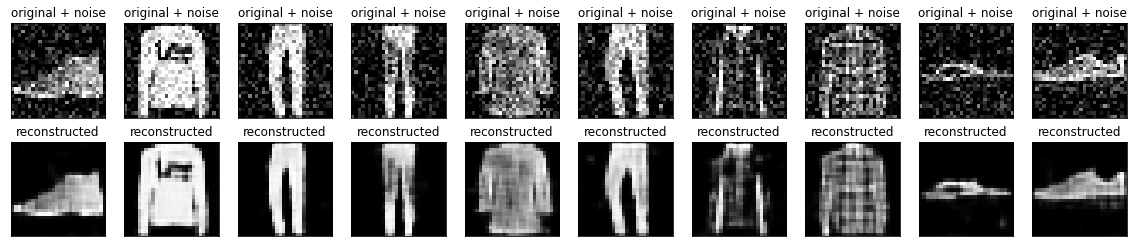

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Third example: Anomaly detection

## Overview


In this example, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

Note: This is a labeled dataset, so you could phrase this as a supervised learning problem. The goal of this example is to illustrate anomaly detection concepts you can apply to larger datasets, where you do not have labels available (for example, if you had many thousands of normal rhythms, and only a small number of abnormal rhythms).

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [20]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [21]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [22]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [23]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

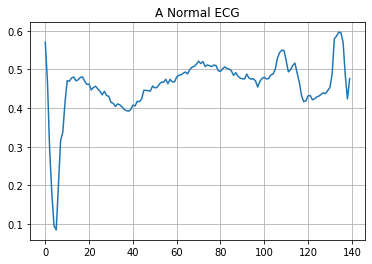

In [24]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

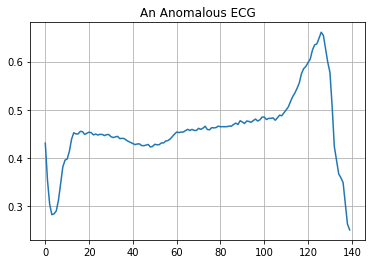

In [25]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [26]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [27]:
autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [28]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20


1/5 [=====>........................] - ETA: 1s - loss: 0.0581

5/5 [==============================] - 1s 30ms/step - loss: 0.0574 - val_loss: 0.0530


Epoch 2/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0559

5/5 [==============================] - 0s 8ms/step - loss: 0.0550 - val_loss: 0.0515


Epoch 3/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0531

5/5 [==============================] - 0s 8ms/step - loss: 0.0519 - val_loss: 0.0497


Epoch 4/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0494

5/5 [==============================] - 0s 7ms/step - loss: 0.0481 - val_loss: 0.0477


Epoch 5/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0456

5/5 [==============================] - 0s 8ms/step - loss: 0.0440 - val_loss: 0.0456


Epoch 6/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0415

5/5 [==============================] - 0s 8ms/step - loss: 0.0400 - val_loss: 0.0433


Epoch 7/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0376

5/5 [==============================] - 0s 7ms/step - loss: 0.0364 - val_loss: 0.0415


Epoch 8/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0341

5/5 [==============================] - 0s 7ms/step - loss: 0.0334 - val_loss: 0.0400


Epoch 9/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0315

5/5 [==============================] - 0s 7ms/step - loss: 0.0309 - val_loss: 0.0389


Epoch 10/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0297

5/5 [==============================] - 0s 8ms/step - loss: 0.0289 - val_loss: 0.0376


Epoch 11/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0275

5/5 [==============================] - 0s 7ms/step - loss: 0.0271 - val_loss: 0.0365


Epoch 12/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0264

5/5 [==============================] - 0s 8ms/step - loss: 0.0256 - val_loss: 0.0354


Epoch 13/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0246

5/5 [==============================] - 0s 8ms/step - loss: 0.0244 - val_loss: 0.0346


Epoch 14/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0228

5/5 [==============================] - 0s 7ms/step - loss: 0.0234 - val_loss: 0.0338


Epoch 15/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0224

5/5 [==============================] - 0s 8ms/step - loss: 0.0226 - val_loss: 0.0332


Epoch 16/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0222

5/5 [==============================] - 0s 7ms/step - loss: 0.0218 - val_loss: 0.0327


Epoch 17/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0214

5/5 [==============================] - 0s 8ms/step - loss: 0.0212 - val_loss: 0.0325


Epoch 18/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0201

5/5 [==============================] - 0s 8ms/step - loss: 0.0207 - val_loss: 0.0319


Epoch 19/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0191

5/5 [==============================] - 0s 7ms/step - loss: 0.0203 - val_loss: 0.0320


Epoch 20/20


1/5 [=====>........................] - ETA: 0s - loss: 0.0211

5/5 [==============================] - 0s 8ms/step - loss: 0.0201 - val_loss: 0.0316


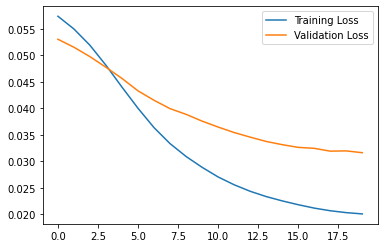

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

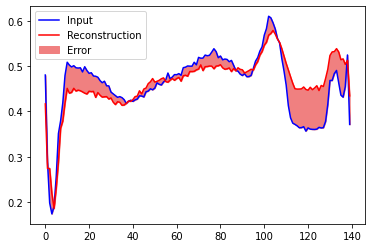

In [30]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

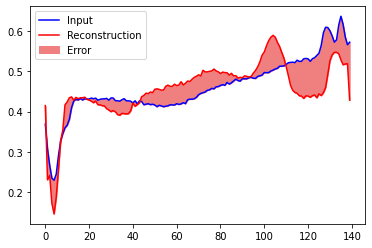

In [31]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

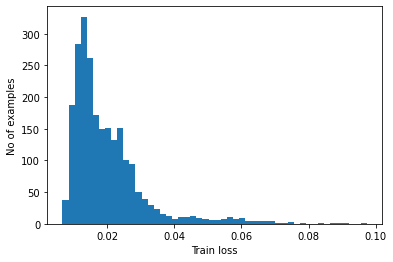

In [32]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [33]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.031436656


Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial. 

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier. 

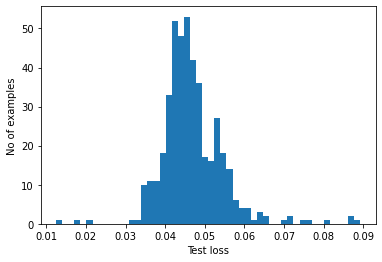

In [34]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [35]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [36]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.945
Precision = 0.9941291585127201
Recall = 0.9071428571428571


## Next steps

To learn more about anomaly detection with autoencoders, check out this excellent [interactive example](https://anomagram.fastforwardlabs.com/#/) built with TensorFlow.js by Victor Dibia. For a real-world use case, you can learn how [Airbus Detects Anomalies in ISS Telemetry Data](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data-tfx.html) using TensorFlow. To learn more about the basics, consider reading this [blog post](https://blog.keras.io/building-autoencoders-in-keras.html) by François Chollet. For more details, check out chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
